# Key Indicators of Heart Disease

## 2020 annual CDC survey data of 400k adults related to their health status

# 1- Import Libraries and Look to Data

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("heart_2020_cleaned.csv")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [6]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# 2- Description of the data

## a- What is columns names?

In [322]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

## b- Variables

1- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).

2- BMI: Body Mass Index (BMI).

3- Smoking: Have you smoked at least 100 cigarettes [Note: 5 packs = 100 cigarettes] in your entire life?

4- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week.

5- Stroke: (Ever told) (you had) a stroke?

6- PhysicalHealth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).

7- MentalHealth: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).

8- DiffWalking: Do you have serious difficulty walking or climbing stairs?

9- Sex: Are you male or female?

10- AgeCategory: Fourteen-level age category. (then calculated the mean)

(18-24,

25-29,

30-34,

35-39,

40-44,

45-49,

50-54,

55-59,

60-64,

65-69,

70-74,

75-79,

80 or older)

11- Race: Imputed race/ethnicity value.

12- Diabetic: (Ever told) (you had) diabetes?

13- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.

14- GenHealth: Would you say that in general your health is...

15- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?

16- Asthma: (Ever told) (you had) asthma?

17- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?

18- SkinCancer: (Ever told) (you had) skin cancer?

I think we can divide these factors into four major categories.

Demography : Sex, AgeCategory, Race

Life Style : Smoking, AlcoholDrinking, PhysicalActivity, SleepTime

Health Condition : BMI, PhysicalHealth, MentalHealth, GenHealth, DiffWalking

Disease : Stroke, KidneyDisease, Diabetic, Asthma, SkinCancer

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [252]:
df.shape

(319795, 18)

Data Set have 18 columns & 319795 rows

## c- Describe function ignores missing values and leaves out Categorical variables.

In [253]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


## d- To include categorical variables:

In [254]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
HeartDisease,319795,2,No,292422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMI,319795.0,NaN,NaN,NaN,28.325399,6.3561,12.02,24.03,27.34,31.42,94.85
Smoking,319795,2,No,187887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AlcoholDrinking,319795,2,No,298018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stroke,319795,2,No,307726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PhysicalHealth,319795.0,NaN,NaN,NaN,3.37171,7.95085,0.0,0.0,0.0,2.0,30.0
MentalHealth,319795.0,NaN,NaN,NaN,3.898366,7.955235,0.0,0.0,0.0,3.0,30.0
DiffWalking,319795,2,No,275385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,319795,2,Female,167805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AgeCategory,319795,13,65-69,34151,NaN,NaN,NaN,NaN,NaN,NaN,NaN


But this was not a very meaningful operation 

In [255]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

# 3- Missing Values

In [256]:
df.isnull().values.any()

False

In [257]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

There is no missing values in this dataset.

# 4- UNIVARIATE VARIABLE ANALYSIS



## 1. Categorical Variable:

- HeartDisease

- Smoking

- AlcoholDrinking

- Stroke

- DiffWalking

- Sex

- AgeCategory

- Race

- Diabetic

- PhysicalActivity

- GenHealth

- Asthma

- KidneyDisease

- SkinCancer

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### To see only categorical variables

In [259]:
df_cat=df.select_dtypes(include=["object"])
df_cat.head(10)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No
5,Yes,Yes,No,No,Yes,Female,75-79,Black,No,No,Fair,No,No,No
6,No,No,No,No,No,Female,70-74,White,No,Yes,Fair,Yes,No,Yes
7,No,Yes,No,No,Yes,Female,80 or older,White,Yes,No,Good,Yes,No,No
8,No,No,No,No,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,No,Yes,No
9,No,No,No,No,Yes,Male,65-69,White,No,Yes,Good,No,No,No


### Classes of categorical variables:

In [260]:
df_cat.AgeCategory.unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [261]:
df_cat.GenHealth.unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

### Number of classes of categorical variables:

In [262]:
df_cat.AgeCategory.value_counts().count()

13

In [263]:
df_cat.GenHealth.value_counts().count()

5

### Frequencies of the classes of the categorical variable:

In [264]:
df_cat.AgeCategory.value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [265]:
df_cat.GenHealth.value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [1]:
# Visualisation Class
class VizData:
    def __init__(self, df, ccol, ft_1, ft_2):
        if type(df) == pd.core.frame.DataFrame \
            and ccol in df.columns \
            and type(ft_1) == type(ft_2) == str:
            self.df = df
            self.ft1 = ft_1
            self.ft2 = ft_2
            self.ccol = ccol
        
    # Visualisation for columns with binary values
    def binviz(self, col, idx,
                  heat_title,
                  don_all_labels, don_all_title= "Main Pie Chart",
                  don_one_title= "Pie Chart 1",
                  don_two_title= "Pie Chart 2",
                  fig_size= (8, 6),
                  binv= ["No", "Yes"]):
        if col in self.df.columns \
                and self.df[col].nunique() == 2 \
                and isinstance(idx, list) \
                and len(idx) == 2 \
                and isinstance(fig_size, tuple) \
                and len(fig_size) == 2 \
                and all(isinstance(k, int) and k > 0 for k in fig_size) \
                and isinstance(don_all_labels, list) \
                and all(isinstance(lab, str) for lab in don_all_labels) \
                and len(don_all_labels) == 4 \
                and all(isinstance(tit, str)
                        for tit in [heat_title,
                                    don_all_title,
                                    don_one_title,
                                    don_two_title]
                       ):
            sns.set_style("dark")
            m_row, n_col = 2, 2
            fig = plt.figure(figsize= (n_col * fig_size[0], m_row * fig_size[1]))
            gs = fig.add_gridspec(m_row, n_col)
            ax = [[fig.add_subplot(gs[i, j]) for j in range(n_col)]
                  for i in range(m_row)]
            
            # heatmap
            heat_df = pd.DataFrame(
                                    {self.ft1: [len(self.df[(self.df[self.ccol] == "Yes")
                                                            & (self.df[col] == binv[1])]),
                                                len(self.df[(self.df[self.ccol] == "Yes")
                                                            & (self.df[col] == binv[0])])
                                               ],
                                     self.ft2: [len(self.df[(self.df[self.ccol] == "No")
                                                            & (self.df[col] == binv[1])]),
                                                len(self.df[(self.df[self.ccol] == "No")
                                                            & (self.df[col] == binv[0])])
                                               ]
                                    }, index= idx)
            ax_00 = sns.heatmap(heat_df, linewidth= 0.1,
                                annot= True, fmt= "d",
                                cmap= "Blues", ax= ax[0][0])
            ax_00.set_title(heat_title, pad= 12)
            
            # Donut Chart All
            don_all_list = [x for x in (list(heat_df[self.ft1]) + list(heat_df[self.ft2]))]
            ax_01 = ax[0][1]
            ax_01.pie(don_all_list, explode= (0.1, 0.1, 0, 0),
                      labels= don_all_labels,
                      autopct= "%1.1f%%",
                      colors= ["salmon", "pink", "lightblue", "turquoise"])
            ax_01.set(title= don_all_title)
            cir_01 = plt.Circle((0, 0), 0.35, fc= 'white')
            ax_01.add_patch(cir_01)
            
            # Donut Chart 1
            don_one_list = list(heat_df.T[idx[0]])
            ax_10 = ax[1][0]
            ax_10.pie(don_one_list, explode= (0.1, 0),
                      labels= [self.ft1, self.ft2],
                      autopct= "%1.1f%%",
                      colors= ["salmon", "turquoise"])
            ax_10.set(title= don_one_title)
            cir_10 = plt.Circle((0, 0), 0.35, fc= 'white')
            ax_10.add_patch(cir_10)
            
            # piechart 2
            don_two_list = list(heat_df[self.ft1])
            ax_11 = ax[1][1]
            ax_11.pie(don_two_list, explode= (0.1, 0),
                      labels= idx,
                      autopct= "%1.1f%%",
                      colors= ["salmon", "turquoise"])
            ax_11.set(title= don_two_title)
            cir_11 = plt.Circle((0, 0), 0.35, fc= 'white')
            ax_11.add_patch(cir_11)
            
            plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
            plt.show()
        
    # Visualisation for columns with numeric values
    def numviz(self, col, d1_labs, d2_labs, d1_div, d2_div,
               d1_colors, d2_colors,
               xlim_1, xlim_2,
               hist_binwidth= 5,
               h1_tit= "Histogram 1", h2_tit= "Histogram 2",
               d1_tit= "Donut Chart 1", d2_tit= "Donut Chart 2",
               fig_size= (8, 6)
              ):
        if col in self.df.columns \
                and self.df[col].dtype in [int, float] \
                and all(isinstance(labs, list)
                        and all(isinstance(l, str) for l in labs)
                        for labs in [d1_labs, d2_labs]) \
                and all(isinstance(div, list)
                        and all(isinstance(d, float) or isinstance(d, int)
                                for d in div)
                        for div in [d1_div, d2_div]
                       ) \
                and len(d1_labs) == len(d1_div) + 1 \
                and len(d2_labs) == len(d2_div) + 1 \
                and all(isinstance(xl, tuple) and all(isinstance(x, int)
                                                      for x in xl)
                        for xl in [xlim_1, xlim_2]) \
                and isinstance(hist_binwidth, int) and hist_binwidth > 0 \
                and all(isinstance(tit, str)
                        for tit in [h1_tit, h2_tit, d1_tit, d2_tit]
                       ):
            sns.set_style("dark")
            m_row, n_col = 2, 2
            fw, fd = fig_size
            fig= plt.figure(figsize= (n_col * fw, m_row * fd))
            gs = fig.add_gridspec(m_row, n_col)
            ax = [[fig.add_subplot(gs[i, j]) for j in range(n_col)]
                  for i in range(m_row)]
            
            # Histogram 1
            h1_data = self.df[(self.df[self.ccol] == "Yes")][col]
            ax_00 = sns.histplot(x= h1_data, binwidth= hist_binwidth,
                                 color= "steelblue",
                                 ax= ax[0][0])
            ax_00.set_title(h1_tit, pad= 12)
            ax_00.set(ylabel= "Count", xlim= xlim_1)
            
            # Donut Chart 1
            d1_divmod = [0] + d1_div + [self.df[(self.df[self.ccol] == "Yes")][col].max()]
            d1_data = [len(self.df[(self.df[self.ccol] == "Yes")
                                   & (d1_divmod[k] <= self.df[col])
                                      & (self.df[col] < d1_divmod[k + 1])]
                          )
                       for k in range(len(d1_divmod) - 2)] \
                       + [len(self.df[(self.df[self.ccol] == "Yes")
                                      & (self.df[col] >= d1_div[-1])])]
            ax_01 = ax[0][1]
            ax_01.pie(d1_data, labels= d1_labs, autopct= "%1.1f%%", colors= d1_colors)
            ax_01.set(title= d1_tit)
            cir_01 = plt.Circle((0, 0), 0.35, fc= "white")
            ax_01.add_patch(cir_01)
            
            # Histogram 2
            h2_data = self.df[(self.df[self.ccol] == "No")][col]
            ax_10 = sns.histplot(x= h2_data, binwidth= hist_binwidth,
                                 color= "steelblue",
                                 ax= ax[1][0])
            ax_10.set_title(h2_tit, pad= 12)
            ax_10.set(ylabel= "Count", xlim= xlim_2)
            
            # Donut 2
            d2_divmod = [0] + d2_div + [self.df[(self.df[self.ccol] == "No")][col].max()]
            d2_data = [len(self.df[(self.df[self.ccol] == "No")
                                   & ((d2_divmod[k] <= self.df[col])
                                      & (self.df[col] < d2_divmod[k + 1]))]
                          )
                       for k in range(len(d2_divmod) - 2)] \
                       + [len(self.df[(self.df[self.ccol] == "No")
                                      & (self.df[col] >= d2_div[-1])])]
            ax_11 = ax[1][1]
            ax_11.pie(d2_data, labels= d2_labs, autopct= "%1.1f%%", colors= d2_colors)
            ax_11.set(title= d2_tit)
            cir_11 = plt.Circle((0, 0), 0.35, fc= "white")
            ax_11.add_patch(cir_11)
            
            plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
            plt.show()

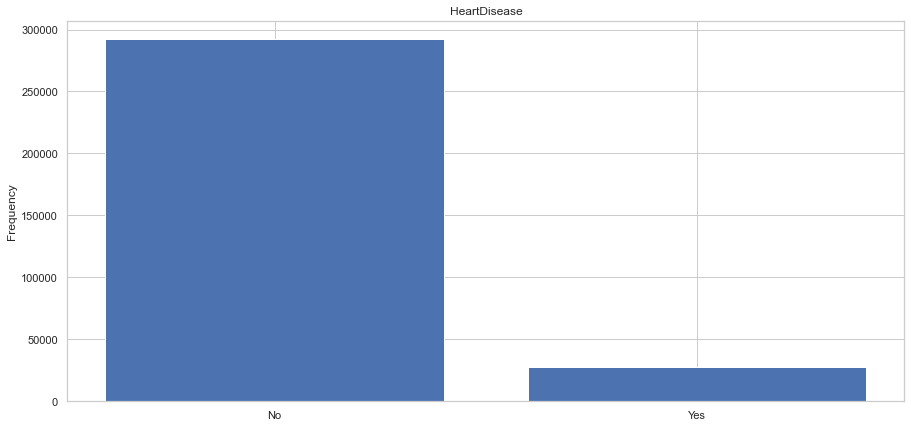

HeartDisease: 
 No     292422
Yes     27373
Name: HeartDisease, dtype: int64


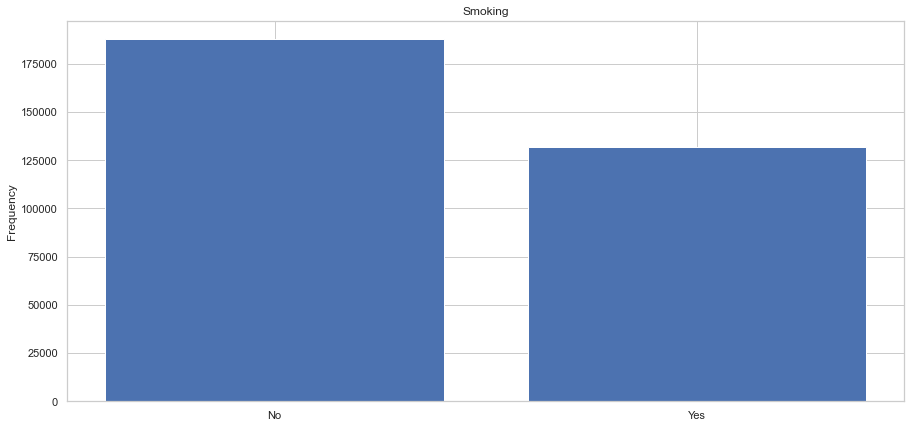

Smoking: 
 No     187887
Yes    131908
Name: Smoking, dtype: int64


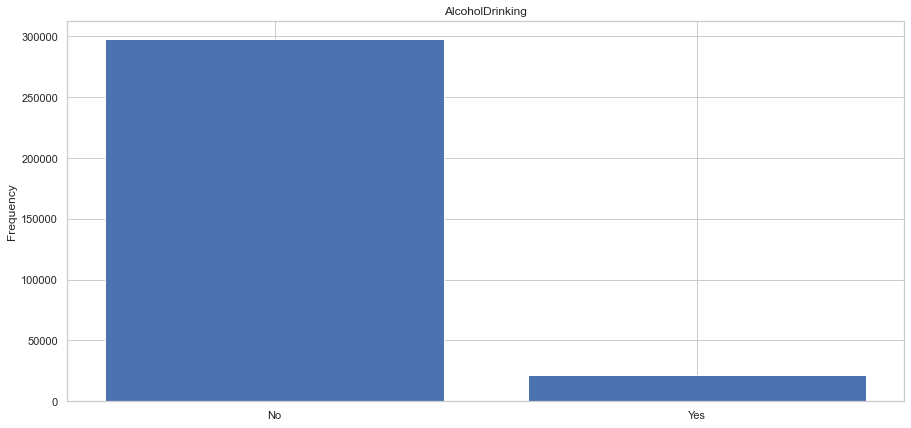

AlcoholDrinking: 
 No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64


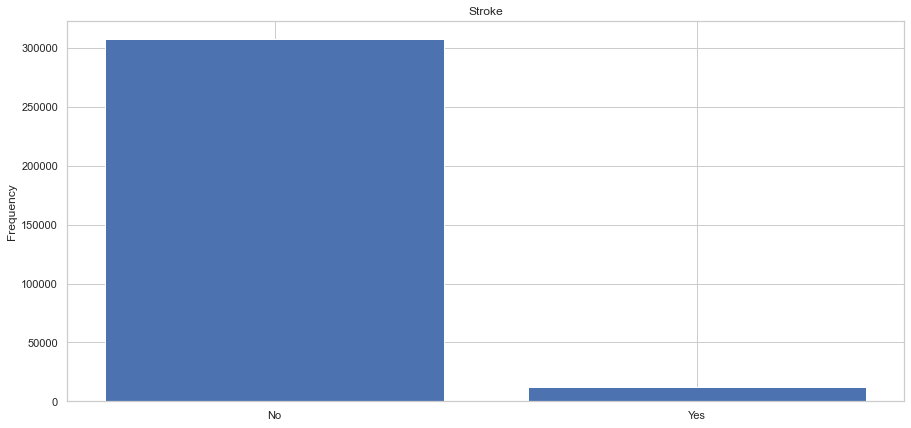

Stroke: 
 No     307726
Yes     12069
Name: Stroke, dtype: int64


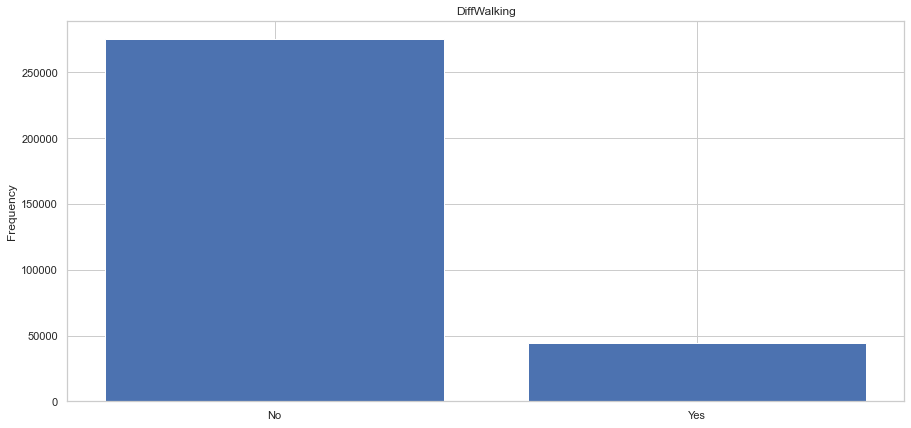

DiffWalking: 
 No     275385
Yes     44410
Name: DiffWalking, dtype: int64


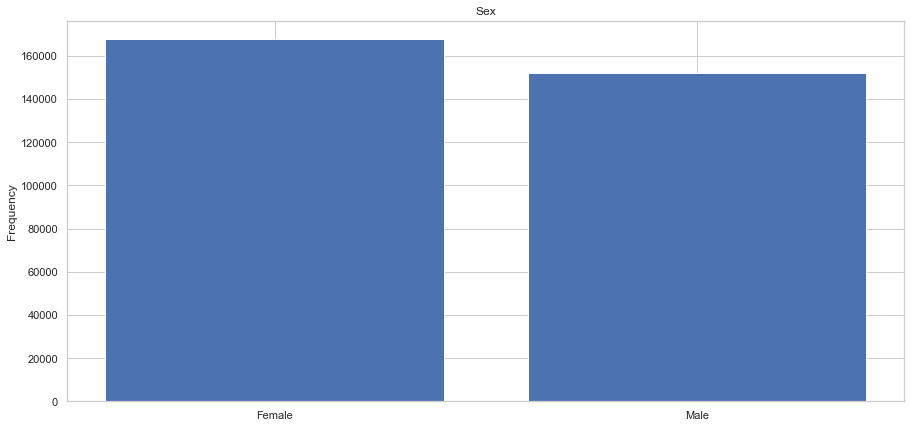

Sex: 
 Female    167805
Male      151990
Name: Sex, dtype: int64


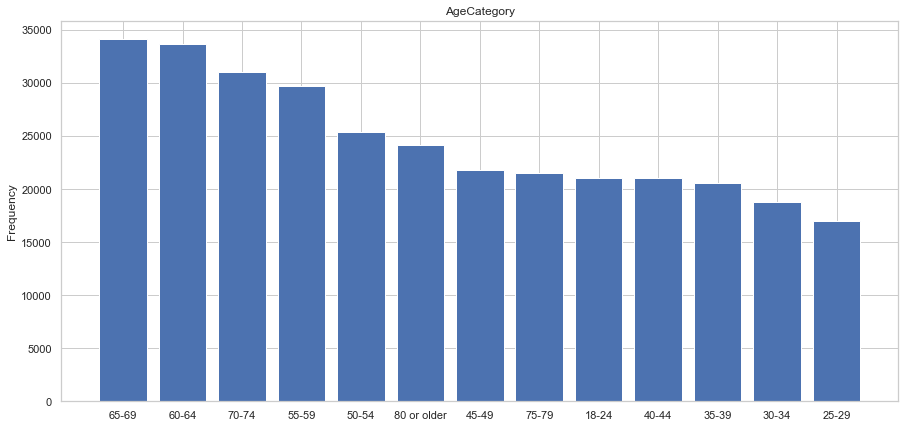

AgeCategory: 
 65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64


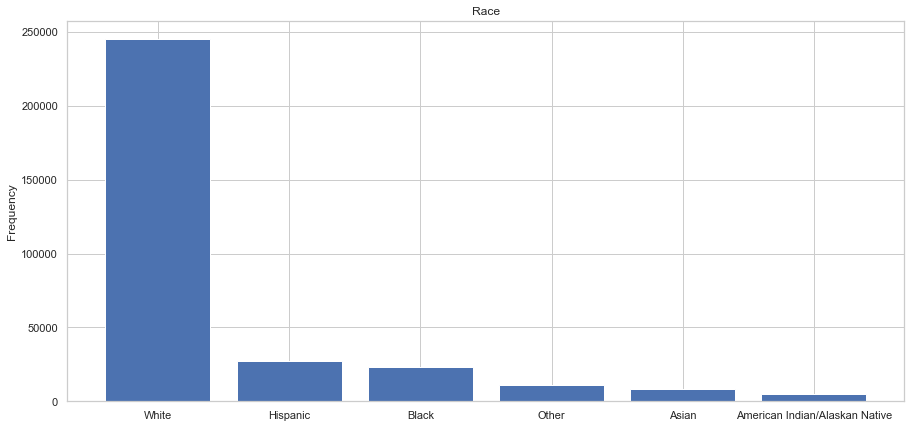

Race: 
 White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64


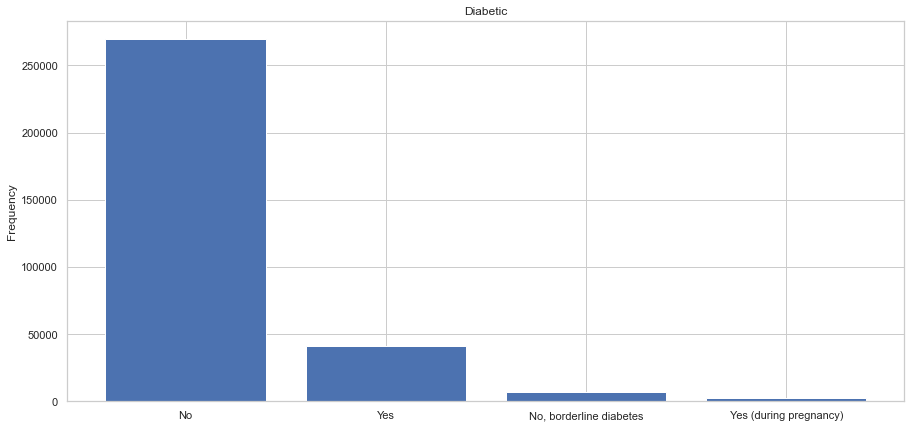

Diabetic: 
 No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64


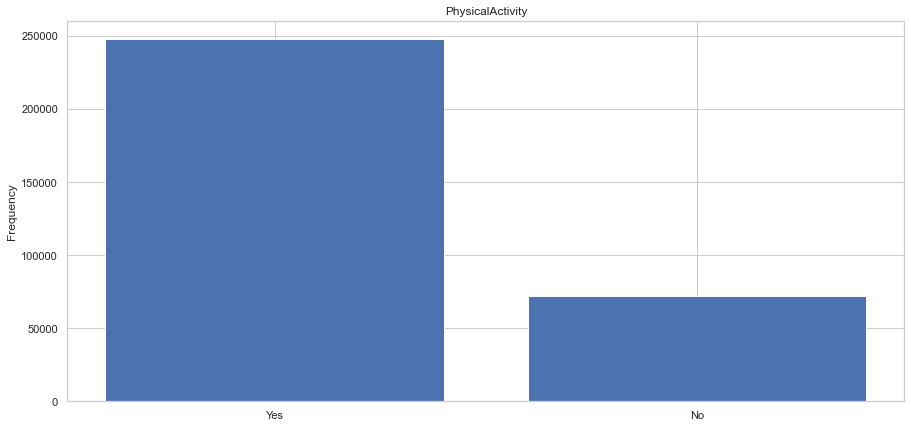

PhysicalActivity: 
 Yes    247957
No      71838
Name: PhysicalActivity, dtype: int64


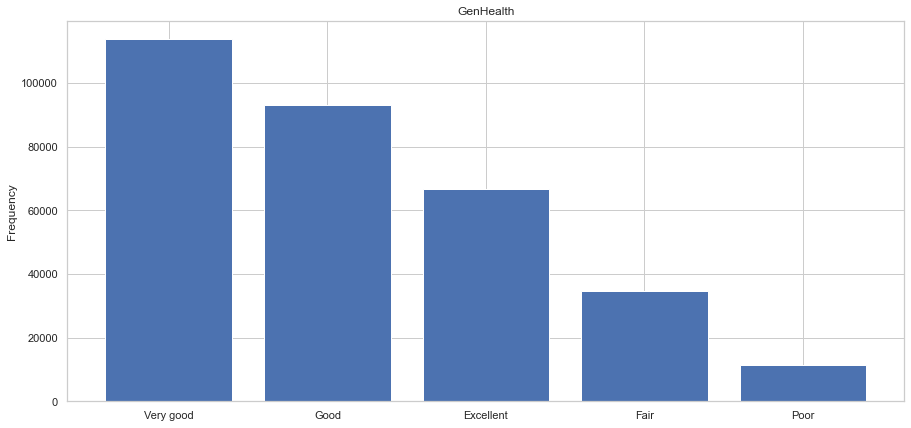

GenHealth: 
 Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64


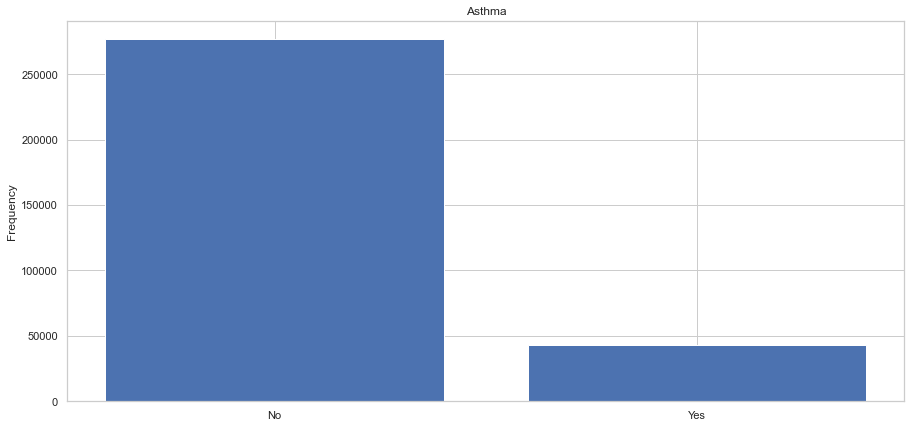

Asthma: 
 No     276923
Yes     42872
Name: Asthma, dtype: int64


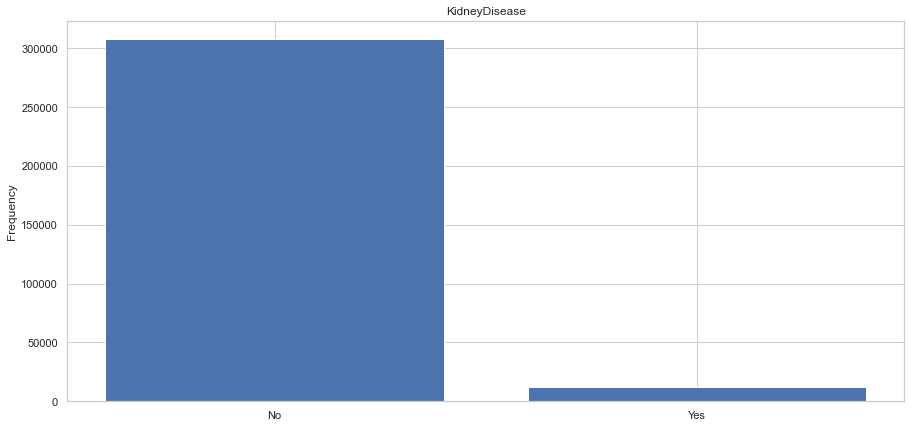

KidneyDisease: 
 No     308016
Yes     11779
Name: KidneyDisease, dtype: int64


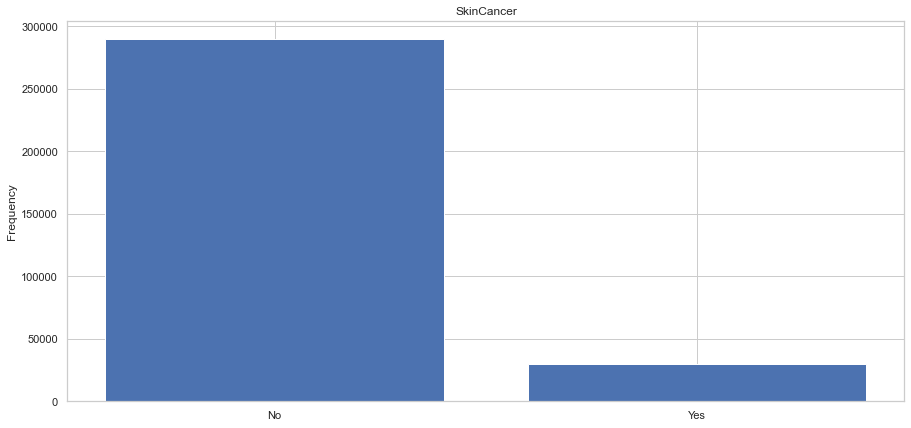

SkinCancer: 
 No     289976
Yes     29819
Name: SkinCancer, dtype: int64


In [266]:
def frequencies(variable):

    # Get columns
    var=df_cat[variable]


    # Frequencies of categorical variables
    varValue=var.value_counts()


    #Visualization
    fig, ax = plt.subplots(figsize=(15,7))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))


for i in df_cat:
  frequencies(i)
    

In [28]:
cat1 = df.nunique()[(df.nunique() > 2) & (df.nunique() < 14)].index
def HeartDisease_and_catig(col):
    fig, ax = plt.subplots(3,1,figsize=(15,18))

    colors = sns.color_palette('colorblind')

    df[col].value_counts().plot(kind='pie',colors=colors, ax=ax[0])
    ax[0].set_title(f" {col} distribution", fontsize=18)
    ax[0].set_ylabel('')

    sns.countplot(data=df.sort_values(col), x=col, hue='HeartDisease', ax=ax[1])
    ax[1].set_title(f"Distribution of HeartDisease by {col}", fontsize=18)
    ax[1].set_xlabel('')
    
    t = pd.DataFrame((df[df['HeartDisease']== 'Yes'][col].value_counts() / df[col].value_counts() * 100)).sort_values(col)
    sns.barplot(y=t[col], x=t[col].index, ax=ax[2])
    ax[2].set_title(f"Percentage of people with heart disease according to {col}", fontsize=18)
    ax[2].set_ylabel('Percentage')

    plt.show()

### AgeCategory

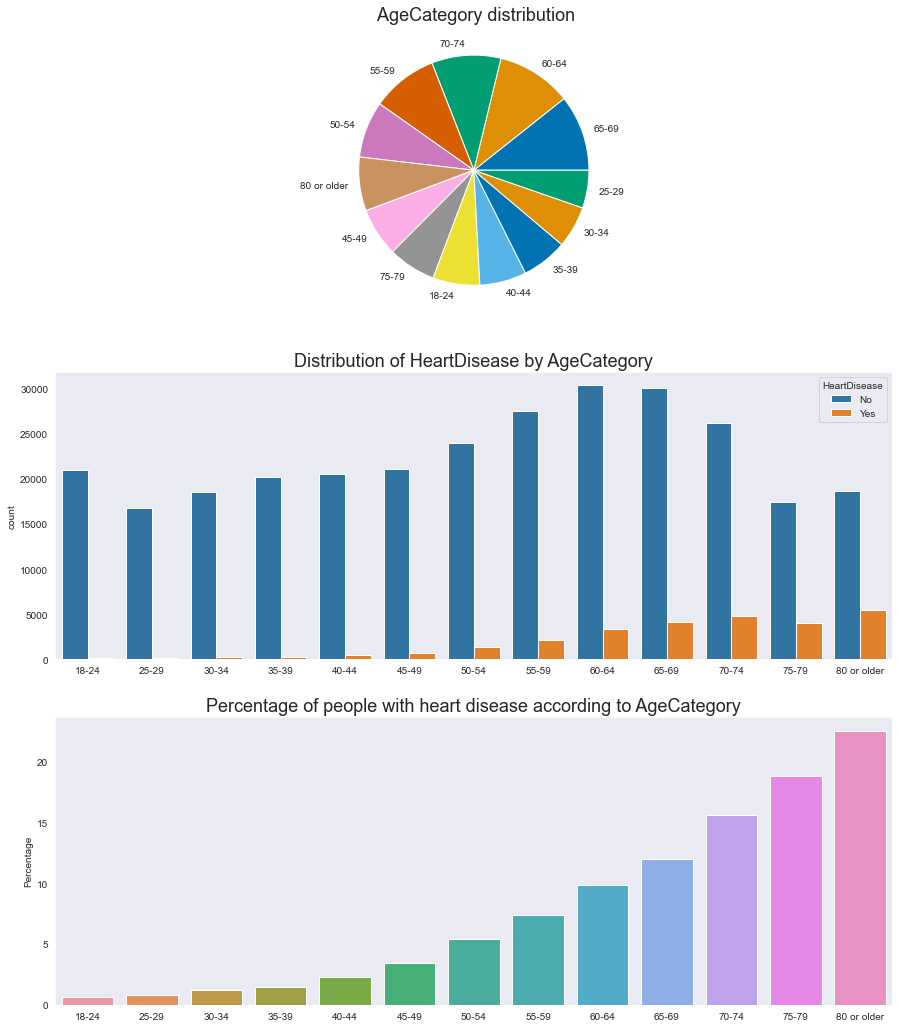

In [29]:
HeartDisease_and_catig('AgeCategory')

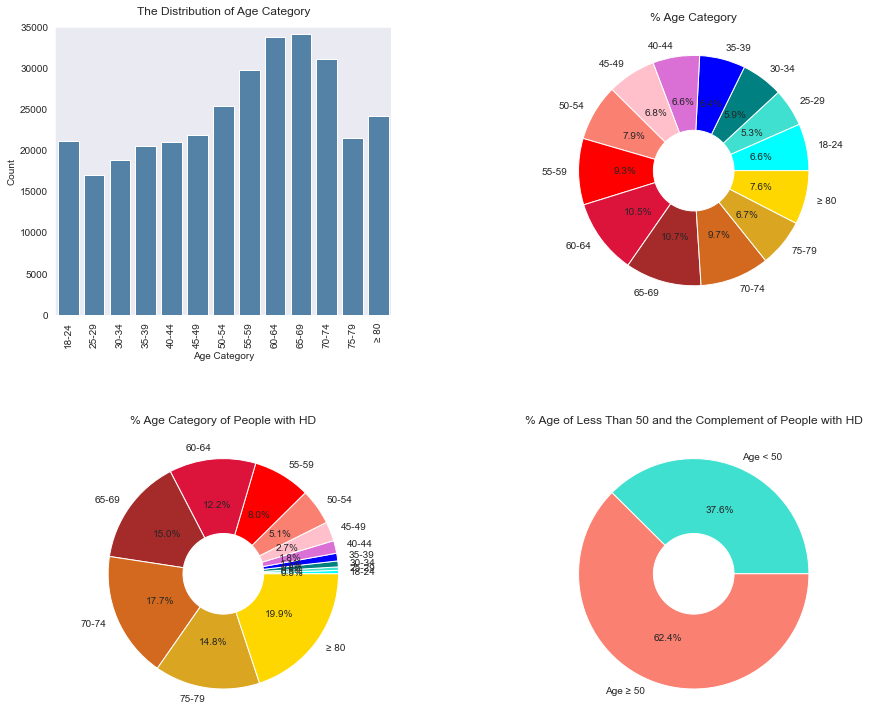

In [19]:
h_row, h_col = 2, 2
h_fig = plt.figure(figsize= (h_col *8, h_row *6))
h_gs = h_fig.add_gridspec(h_row, h_col)
h_ax = [[h_fig.add_subplot(h_gs[i, j]) for j in range(h_col)]
        for i in range(h_row)]

h_colors = ["aqua", "turquoise", "teal",
            "blue", "orchid", "pink",
            "salmon", "red", "crimson",
            "brown", "chocolate", "goldenrod",
            "gold"]
h_val_uniq = sorted(list(df["AgeCategory"].unique()))
h_labels = h_val_uniq[0: -1] + ["≥ 80"]

# Barplot
# bar_h_x = sorted(list(data_df["AgeCategory"].unique()))
bar_h_height = [list(df["AgeCategory"]).count(x) for x in h_val_uniq]
# bar_h_labels = bar_h_x[0:-1] + ["≥ 80"]
hax_00 = sns.barplot(x= h_val_uniq, y= bar_h_height,
                     color= "steelblue",
                     ax= h_ax[0][0])
hax_00.set_title("The Distribution of Age Category", pad= 12)
hax_00.set(xlabel= "Age Category",
           ylabel= "Count", ylim= (0, 35000))
hax_00.set_xticklabels(h_labels, rotation= "vertical")

# Donut Chart of Age Category within the Whole Population
don_h01_data = bar_h_height
# don_h01_labels = bar_h_labels
hax_01 = h_ax[0][1]
hax_01.pie(don_h01_data,
           labels= h_labels,
           autopct= "%1.1f%%", colors= h_colors
           )
hax_01.set_title("% Age Category")
cirh_01 = plt.Circle((0, 0), 0.35, fc= "white")
hax_01.add_patch(cirh_01)

# Donut Chart of Age Category within People with HD
don_h10_data = [list(df[(df["HeartDisease"] == "Yes")]["AgeCategory"]).count(x)
                for x in h_val_uniq]
hax_10 = h_ax[1][0]
hax_10.pie(don_h10_data,
           labels= h_labels,
           autopct= "%1.1f%%",
           colors= h_colors)
hax_10.set_title("% Age Category of People with HD")
cirh_10 = plt.Circle((0, 0), 0.35, fc= "white")
hax_10.add_patch(cirh_10)

# Donut Chart of New Age Category within People without HD
don_h11_data = [sum(bar_h_height[0:6]), sum(bar_h_height[6:])]
hax_11 = h_ax[1][1]
hax_11.pie(don_h11_data,
           labels= ["Age < 50", "Age ≥ 50"],
           autopct= "%1.1f%%",
           colors= ["turquoise", "salmon"])
hax_11.set_title("% Age of Less Than 50 and the Complement of People with HD")
cirh_11 = plt.Circle((0, 0), 0.35, fc= "white")
hax_11.add_patch(cirh_11)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

The risk of heart disease increases with age.


People older than 60 tend to have heart disease than those younger than 60.

### Race

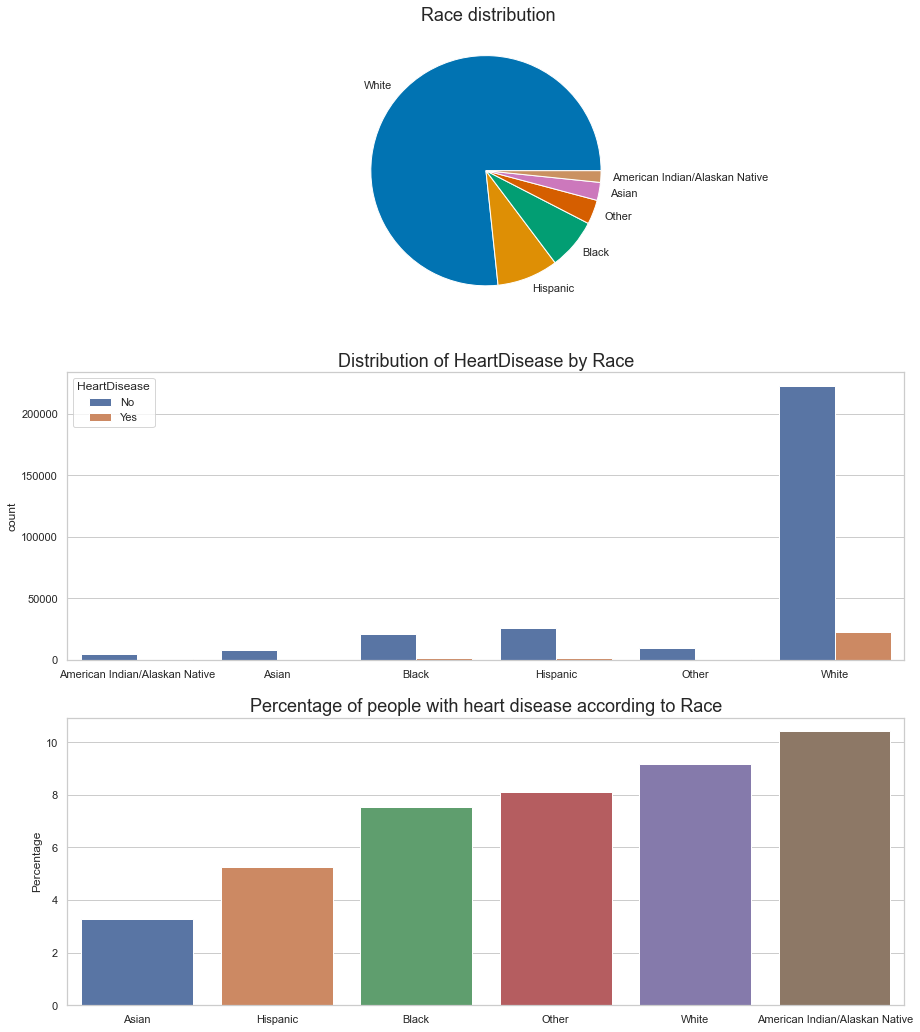

In [268]:
HeartDisease_and_catig('Race')

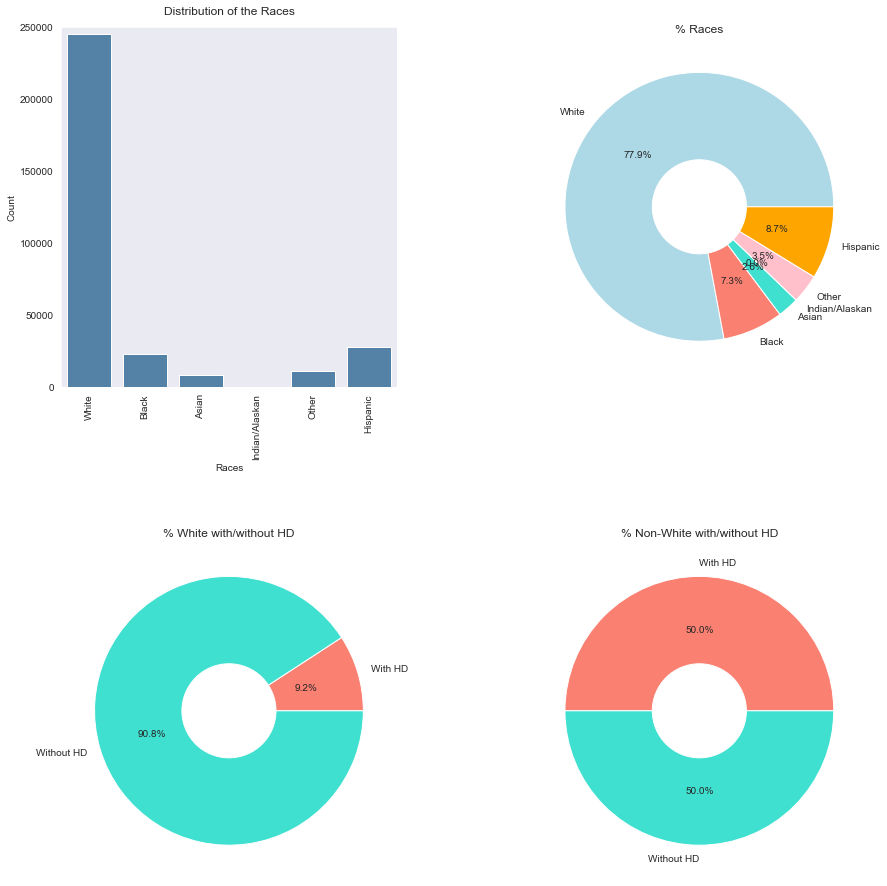

In [21]:
i_row, i_col = 2, 2
i_fig = plt.figure(figsize= (i_col *8, i_row *6))
i_gs = i_fig.add_gridspec(i_row, i_col)
i_ax = [[i_fig.add_subplot(i_gs[i, j]) for j in range(i_col)]
        for i in range(i_row)]

i_uniq_vals = list(df["Race"].unique())
i_labels = i_uniq_vals
i_labels[3] = "Indian/Alaskan"
i_colors = ["lightblue", "salmon", "turquoise", "yellow", "pink", "orange"]

# Distribution of the Races within the Population
bar_i00_data = [list(df["Race"]).count(x) for x in i_uniq_vals]
bar_i00_labs = i_uniq_vals
iax_00 = sns.barplot(x= i_uniq_vals, y= bar_i00_data,
                     color= "steelblue",
                     ax= i_ax[0][0])
iax_00.set_title("Distribution of the Races", pad= 12)
iax_00.set(xlabel= "Races", ylabel= "Count", ylim= (0, 250000))
iax_00.set_xticklabels(i_labels, rotation= "vertical")

# Donut Chart of the Races
don_i01_data = bar_i00_data
iax_01 = i_ax[0][1]
iax_01.pie(don_i01_data,
           labels= i_labels,
           autopct= "%1.1f%%",
           colors= i_colors)
iax_01.set_title("% Races")
ciri_01 = plt.Circle((0, 0), 0.35, fc= "white")
iax_01.add_patch(ciri_01)

# Donut Chart of White with HD
don_i10_data = [len(df[(df["HeartDisease"] == "Yes")
                             & (df["Race"] == "White")]),
                len(df[(df["HeartDisease"] == "No")
                             & (df["Race"] == "White")])]
iax_10 = i_ax[1][0]
iax_10.pie(don_i10_data,
           labels= ["With HD", "Without HD"],
           autopct= "%1.1f%%",
           colors= ["salmon", "turquoise"])
iax_10.set_title("% White with/without HD")
ciri_10 = plt.Circle((0, 0), 0.35, fc= "white")
iax_10.add_patch(ciri_10)

# Donut Chart of Non-White with HD
don_i11_data = [len(df[(df["HeartDisease"] == "Yes")
                             & (df["Race"] != "White")]),
                len(df[(df["HeartDisease"] == "Yes")
                             & (df["Race"] != "White")])]
iax_11 = i_ax[1][1]
iax_11.pie(don_i11_data,
           labels= ["With HD", "Without HD"],
           autopct= "%1.1f%%",
           colors= ["salmon", "turquoise"])
iax_11.set_title("% Non-White with/without HD")
ciri_11 = plt.Circle((0, 0), 0.35, fc= "white")
iax_11.add_patch(ciri_11)


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=1.1, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()


Slightly more likely to have heart disease in White and American Indians/Alaska Natives.


Race does not seem to have constributions to heart disease. People of any race could have heart disease.

### Diabetic

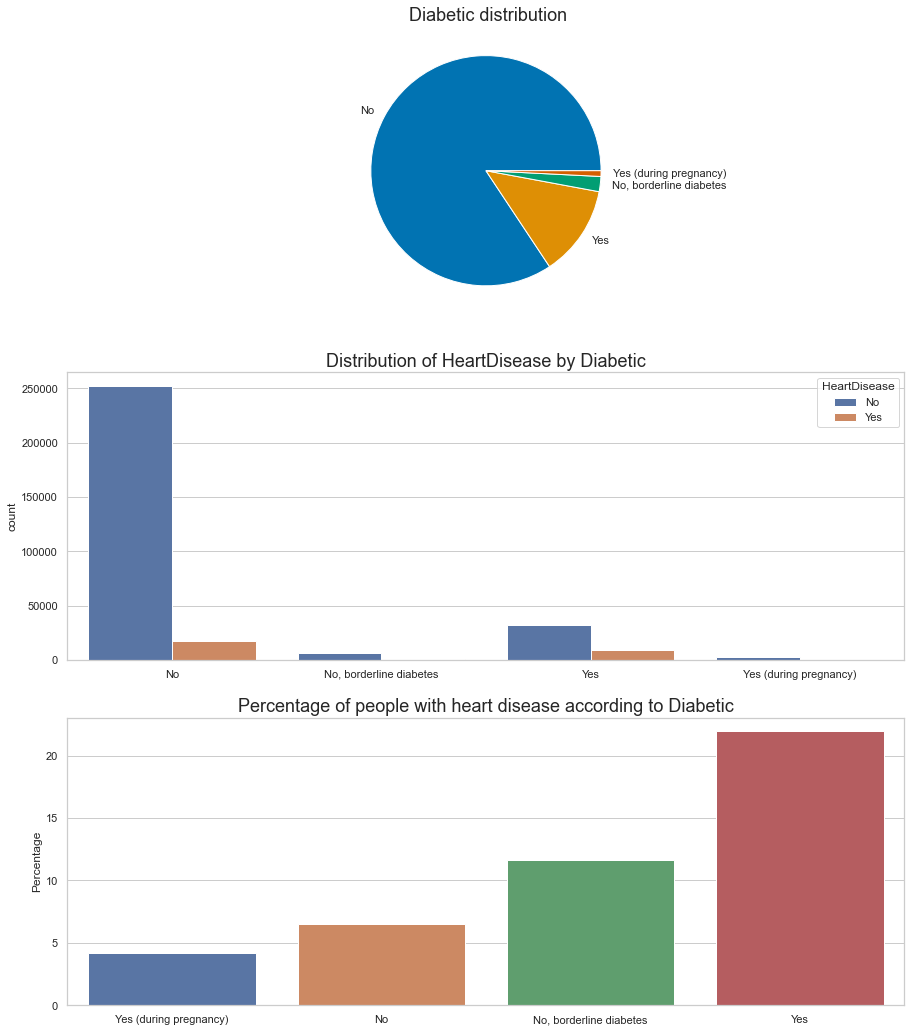

In [269]:
HeartDisease_and_catig('Diabetic')

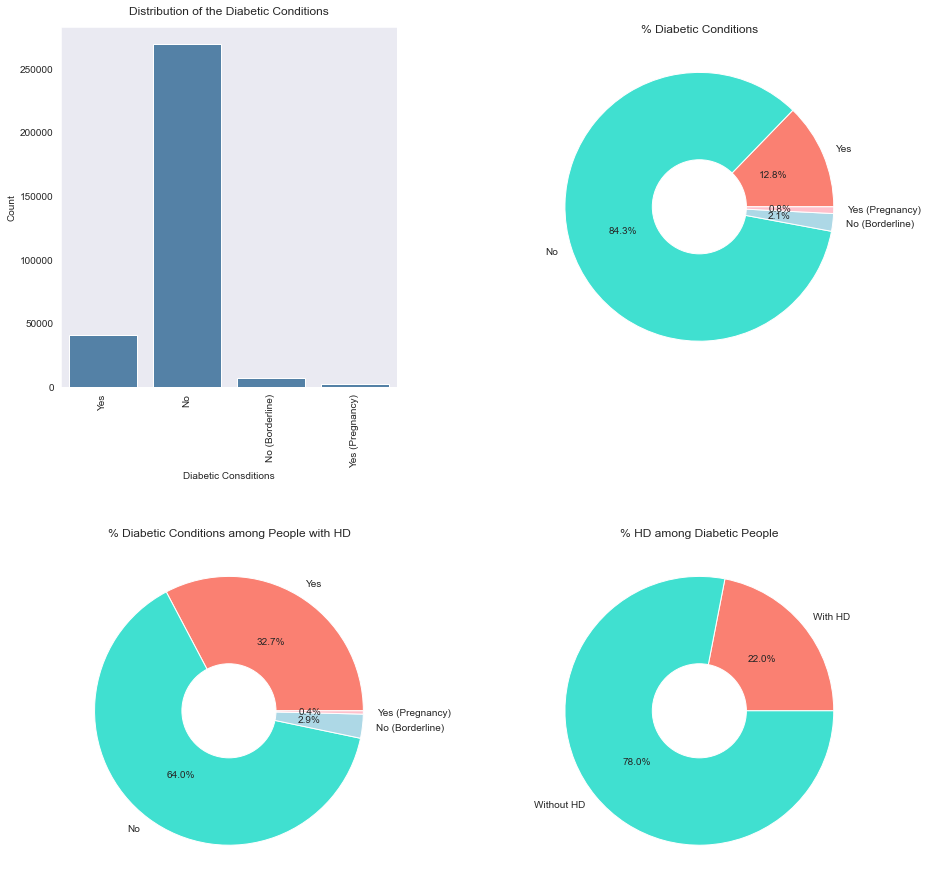

In [22]:
j_row, j_col = 2, 2
j_fig = plt.figure(figsize= (j_col *8, j_row *6))
j_gs = j_fig.add_gridspec(j_row, j_col)
j_ax = [[j_fig.add_subplot(j_gs[i, j]) for j in range(j_col)]
        for i in range(j_row)]

j_labels = ["Yes", "No", "No (Borderline)", "Yes (Pregnancy)"]

# Distribution of the Diabetic Conditions
bar_j00_data = [len(df[(df["Diabetic"] == cond)])
                for cond in df["Diabetic"].unique()]
jax_00 = sns.barplot(x= df["Diabetic"].unique(), y= bar_j00_data,
                     color= "steelblue",
                     ax= j_ax[0][0])
jax_00.set_title("Distribution of the Diabetic Conditions", pad= 12)
jax_00.set(xlabel= "Diabetic Consditions", ylabel= "Count")
jax_00.set_xticklabels(j_labels, rotation= "vertical")

# Donut Chart of the Diabetic Conditions within the Population
don_j01_data = bar_j00_data
jax_01 = j_ax[0][1]
jax_01.pie(don_j01_data,
           labels= j_labels,
           autopct= "%1.1f%%",
           colors= ["salmon", "turquoise", "lightblue", "pink"])
jax_01.set_title("% Diabetic Conditions")
cirj_01 = plt.Circle((0, 0), 0.35, fc= "white")
jax_01.add_patch(cirj_01)

# Donut Chart of Diabetic Conditions among People with HD
don_10_data = [len(df[(df["HeartDisease"] == "Yes")
                           & (df["Diabetic"] == cond)])
                for cond in df["Diabetic"].unique()]
jax_10 = j_ax[1][0]
jax_10.pie(don_10_data,
           labels= j_labels,
           autopct= "%1.1f%%",
           colors= ["salmon", "turquoise", "lightblue", "pink"])
jax_10.set_title("% Diabetic Conditions among People with HD")
cirj_10 = plt.Circle((0, 0), 0.35, fc= "white")
jax_10.add_patch(cirj_10)

# Donut Chart of HD among People with Diabetic
don_11_data = [len(df[(df["HeartDisease"] == "Yes")
                           & (df["Diabetic"] == "Yes")]),
               len(df[(df["HeartDisease"] == "No")
                           & (df["Diabetic"] == "Yes")])]
jax_11 = j_ax[1][1]
jax_11.pie(don_11_data,
           labels= ["With HD", "Without HD"],
           autopct= "%1.1f%%",
           colors= ["salmon", "turquoise"])
jax_11.set_title("% HD among Diabetic People")
cirj_11 = plt.Circle((0, 0), 0.35, fc= "white")
jax_11.add_patch(cirj_11)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=1.1, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

Diabetes contributes to heart disease.

### GenHealth

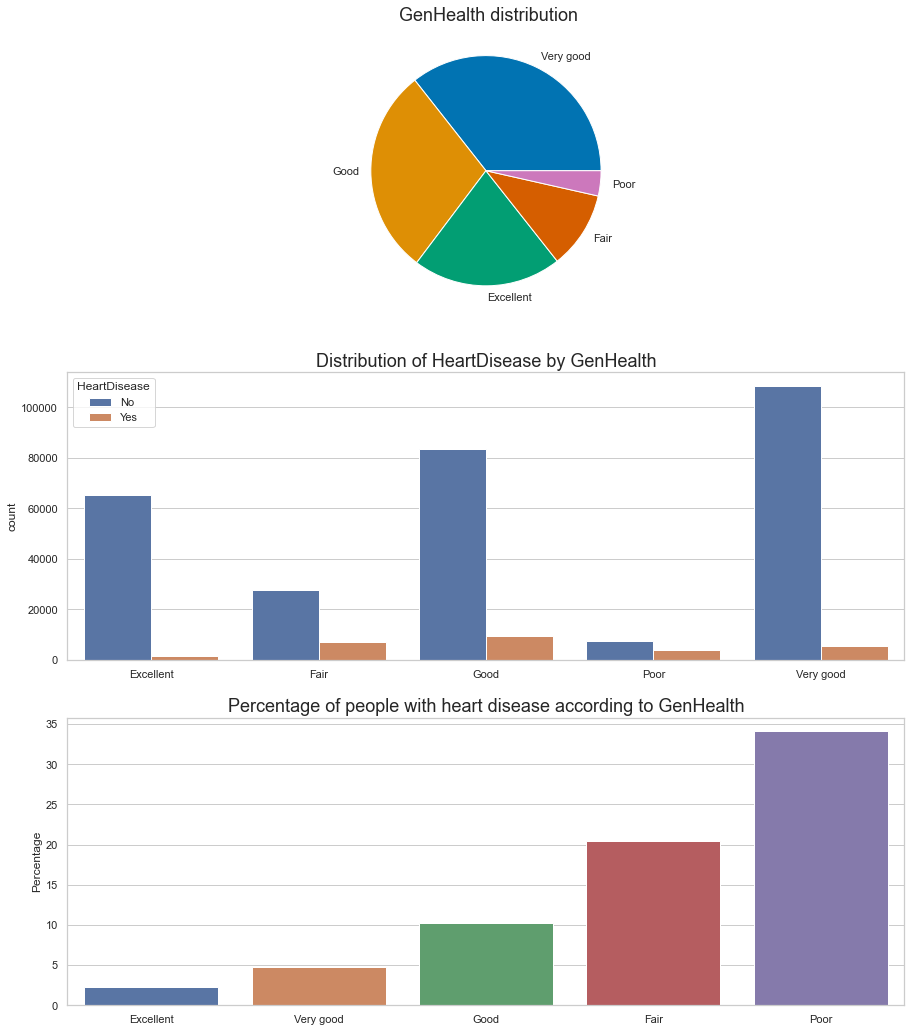

In [270]:
HeartDisease_and_catig('GenHealth')

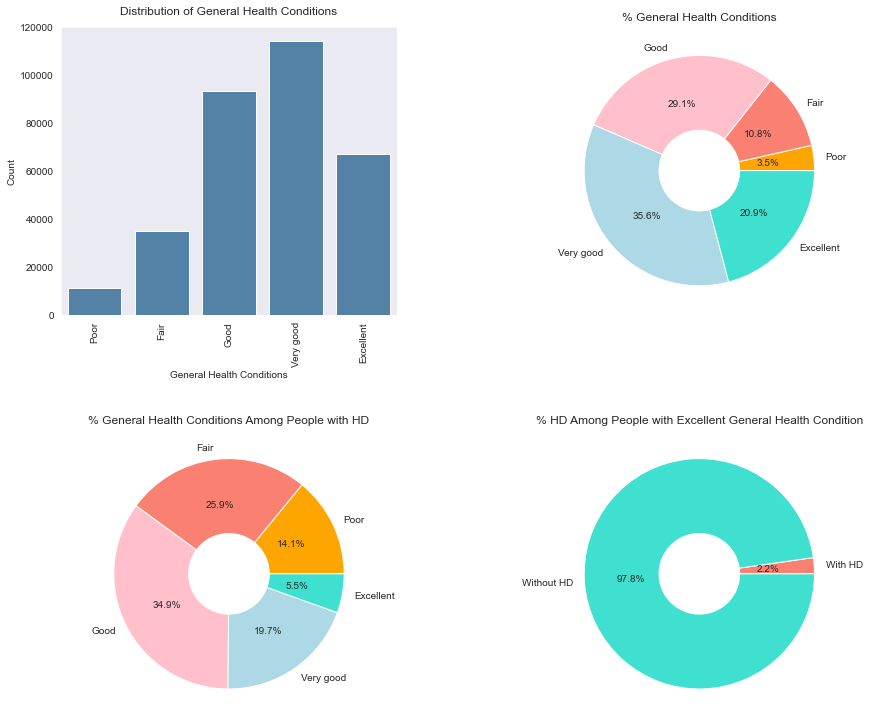

In [34]:
l_row, l_col = 2, 2
l_fig = plt.figure(figsize= (l_col *8, l_row *6))
l_gs = l_fig.add_gridspec(l_row, l_col)
l_ax = [[l_fig.add_subplot(l_gs[i, j]) for j in range(l_col)]
        for i in range(l_row)]

l_uniq = ["Poor", "Fair", "Good", "Very good", "Excellent"]
l_colors = ["orange", "salmon", "pink", "lightblue", "turquoise"]

# Distribution of the General Health Conditions Among the Population
bar_l00_data = [len(df[(df["GenHealth"] == x)]) for x in l_uniq]
lax_00 = sns.barplot(x= l_uniq, y= bar_l00_data,
                     color= "steelblue",
                     ax= l_ax[0][0])
lax_00.set_title("Distribution of General Health Conditions",
                 pad= 12)
lax_00.set(xlabel= "General Health Conditions",
           ylabel= "Count",
           ylim= (0, 120000))
lax_00.set_xticklabels(l_uniq, rotation= "vertical")

# Donut Chart of the General Health Conditions Among the Population
don_l00_data = bar_l00_data
lax_01 = l_ax[0][1]
lax_01.pie(don_l00_data,
           labels= l_uniq,
           autopct= "%1.1f%%",
           colors= l_colors)
lax_01.set_title("% General Health Conditions")
cirl_01 = plt.Circle((0, 0), 0.35, fc= "white")
lax_01.add_patch(cirl_01)

# Donut Chart of General Health Conditions Among People with HD
don_10_data = [len(df[(df["HeartDisease"] == "Yes")
                            & (df["GenHealth"] == x)])
               for x in l_uniq]
lax_10 = l_ax[1][0]
lax_10.pie(don_10_data,
           labels= l_uniq,
           autopct= "%1.1f%%",
           colors= l_colors)
lax_10.set_title("% General Health Conditions Among People with HD")
cirl_10 = plt.Circle((0, 0), 0.35, fc= "white")
lax_10.add_patch(cirl_10)

# Donut Chart of HD Among People with Non-Excellent General Health Conditions
don_11_data = [len(df[(df["HeartDisease"] == "Yes")
                            & (df["GenHealth"] == "Excellent")]),
               len(df[(df["HeartDisease"] == "No")
                            & (df["GenHealth"] == "Excellent")])]
lax_11 = l_ax[1][1]
lax_11.pie(don_11_data,
           labels= ["With HD", "Without HD"],
           autopct= "%1.1f%%",
           colors= ["salmon", "turquoise"])
lax_11.set_title("% HD Among People with Excellent General Health Condition")
cirl_11 = plt.Circle((0, 0), 0.35, fc= "white")
lax_11.add_patch(cirl_11)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

Poor general health markedly increases the likelihood of heart disease, but people with heart disease may report general health as good

In [30]:
colors = sns.color_palette('colorblind')
def HeartDisease_and_bin(column):

    figure, ax = plt.subplots(1,3,figsize=(16,5))
    sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts(), ax=ax[0])
    ax[0].set_title(f'{column} distribution')
    ax[1].pie(df[df['HeartDisease'] == "No"][column].value_counts(), labels=df[df['HeartDisease'] == "No"][column].value_counts().index, colors=colors)
    ax[1].set_title('No Heart Disease')
    ax[2].pie(df[df['HeartDisease'] == "Yes"][column].value_counts(), labels=df[df['HeartDisease'] == "Yes"][column].value_counts().index, colors=colors)
    ax[2].set_title('Yes Heart Disease')

    plt.show()

### Target variable (Heart Disease) and "Sex"

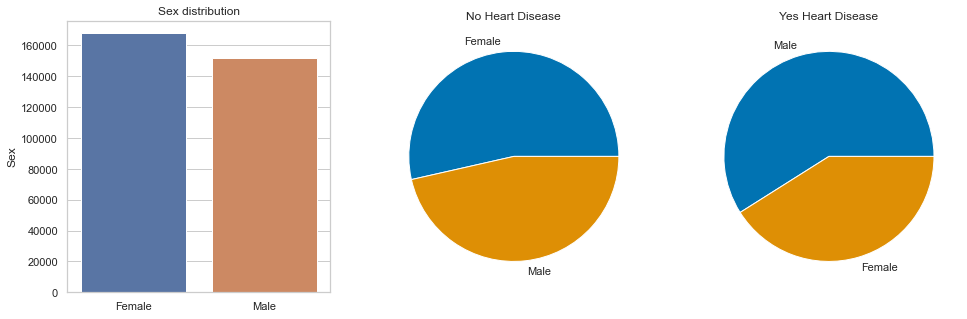

In [272]:
HeartDisease_and_bin('Sex')

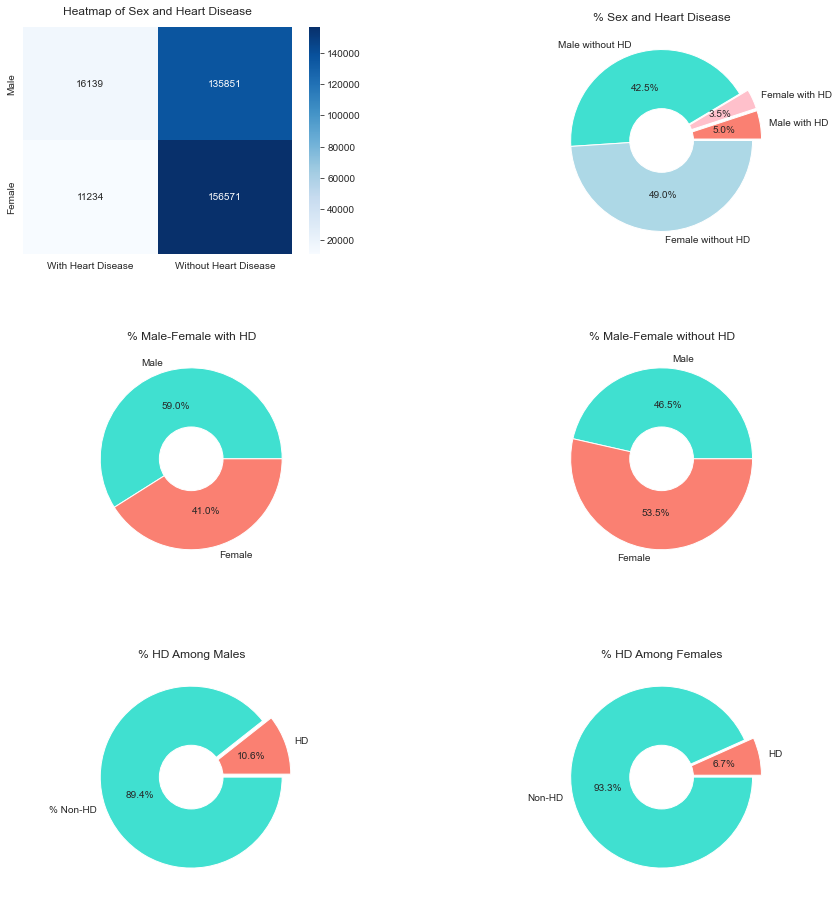

In [18]:
g_row, g_col = 3, 2
g_fig = plt.figure(figsize= (g_col * 8, g_row * 5))
g_gs = g_fig.add_gridspec(g_row, g_col)
g_ax = [[g_fig.add_subplot(g_gs[i, j]) for j in range(g_col)]
        for i in range(g_row)]
sns.set_style("dark")

# Heatmap of Sex and Heart Disease
sex_hd_data = [
    len(df[(df["HeartDisease"] == "Yes") & (df["Sex"] == "Male")]),
    len(df[(df["HeartDisease"] == "Yes") & (df["Sex"] == "Female")]),
    len(df[(df["HeartDisease"] == "No") & (df["Sex"] == "Male")]),
    len(df[(df["HeartDisease"] == "No") & (df["Sex"] == "Female")])
]
sex_hd_data = pd.DataFrame(
    {"With Heart Disease": [
        len(df[(df["HeartDisease"] == "Yes") & (df["Sex"] == "Male")]),
        len(df[(df["HeartDisease"] == "Yes") & (df["Sex"] == "Female")])],
     "Without Heart Disease": [
         len(df[(df["HeartDisease"] == "No") & (df["Sex"] == "Male")]),
         len(df[(df["HeartDisease"] == "No") & (df["Sex"] == "Female")])]
    },
    index= ["Male", "Female"])
gax_00 = sns.heatmap(data= sex_hd_data,
#                      linewidth= 0.1,
                     annot= True, fmt= "d",
                     cmap= "Blues",
                     ax= g_ax[0][0])
gax_00.set_title("Heatmap of Sex and Heart Disease", pad= 12)

# Donut Chart All
don_all_data = list(sex_hd_data["With Heart Disease"].values) \
                + list(sex_hd_data["Without Heart Disease"].values)
gax_01 = g_ax[0][1]
gax_01.pie(don_all_data, explode= (0.1, 0.1, 0, 0),
           labels= ["Male with HD",
                    "Female with HD",
                    "Male without HD",
                    "Female without HD"],
           autopct= "%1.1f%%",
           colors= ["salmon", "pink", "turquoise", "lightblue"]
          )
gax_01.set_title("% Sex and Heart Disease")
cirg_01 = plt.Circle((0, 0), 0.35, fc= "white")
gax_01.add_patch(cirg_01)

# Donut Chart Male-Female % of HD Population
don_10_data = [len(df[(df["HeartDisease"] == "Yes") & (df["Sex"] == "Male")]),
               len(df[(df["HeartDisease"] == "Yes") & (df["Sex"] == "Female")])]
gax_10 = g_ax[1][0]
gax_10.pie(don_10_data,
           labels= ["Male", "Female"],
           autopct= "%1.1f%%",
           colors= ["turquoise", "salmon"])
gax_10.set_title("% Male-Female with HD")
cirg_10 = plt.Circle((0, 0), 0.35, fc= "white")
gax_10.add_patch(cirg_10)

# Donut Chart Male-Female % of No HD Population
don_11_data = [len(df[(df["HeartDisease"] == "No") & (df["Sex"] == "Male")]),
               len(df[(df["HeartDisease"] == "No") & (df["Sex"] == "Female")])]
gax_11 = g_ax[1][1]
gax_11.pie(don_11_data,
           labels= ["Male", "Female"],
           autopct= "%1.1f%%",
           colors= ["turquoise", "salmon"])
gax_11.set_title("% Male-Female without HD")
cirg_11 = plt.Circle((0, 0), 0.35, fc= "white")
gax_11.add_patch(cirg_11)

# Donut Chart of HD Among Males
don_20_data = [len(df[(df["HeartDisease"] == "Yes") & (df["Sex"] == "Male")]),
               len(df[(df["HeartDisease"] == "No") & (df["Sex"] == "Male")])]
gax_20 = g_ax[2][0]
gax_20.pie(don_20_data, explode= (0.1, 0),
           labels= ["HD", "% Non-HD"],
           autopct= "%1.1f%%",
           colors= ["salmon", "turquoise"])
gax_20.set_title("% HD Among Males")
cirg_20 = plt.Circle((0, 0), 0.35, fc= "white")
gax_20.add_patch(cirg_20)

# Donut Chart of HD Among Females
don_21_data = [len(df[(df["HeartDisease"] == "Yes") & (df["Sex"] == "Female")]),
               len(df[(df["HeartDisease"] == "No") & (df["Sex"] == "Female")])]
gax_21 = g_ax[2][1]
gax_21.pie(don_21_data, explode= (0.1, 0),
           labels= ["HD", "Non-HD"],
           autopct= "%1.1f%%",
           colors= ["salmon", "turquoise"])
gax_21.set_title("% HD Among Females")
cirg_21 = plt.Circle((0, 0), 0.35, fc= "white")
gax_21.add_patch(cirg_21)


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

Heart disease surveillance is more common in men than in women.

### Target variable and "Smoking"

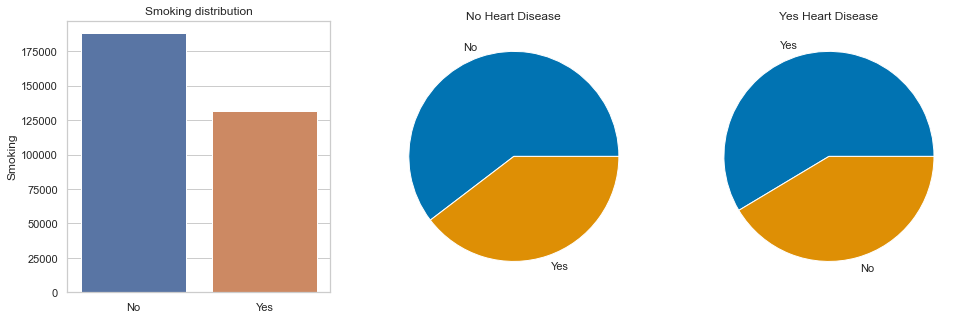

In [273]:
HeartDisease_and_bin('Smoking')

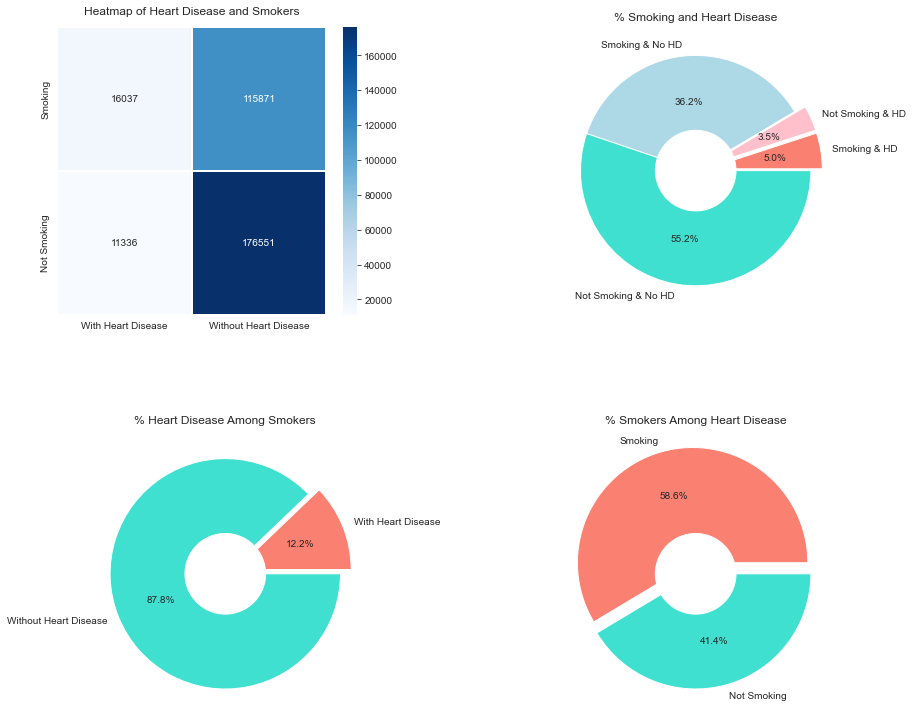

In [8]:

smoking_idx = ["Smoking", "Not Smoking"]
smoking_all_labs = ["Smoking & HD",
                    "Not Smoking & HD",
                    "Smoking & No HD",
                    "Not Smoking & No HD"]
observ.binviz("Smoking", smoking_idx,
              "Heatmap of Heart Disease and Smokers",
              smoking_all_labs,
              don_all_title= "% Smoking and Heart Disease",
              don_one_title= "% Heart Disease Among Smokers",
              don_two_title= "% Smokers Among Heart Disease")

Smoking contributes to heart disease.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'HeartDisease')

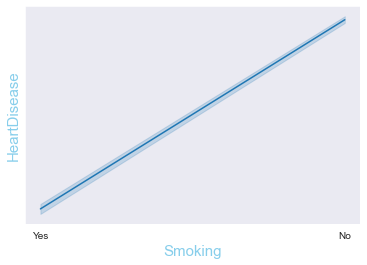

In [41]:
X = df["Smoking"].values
Y = df["HeartDisease"].values
line_plot = sns.lineplot(X,Y)
line_plot.set_xlabel("Smoking", fontsize = 15,color="skyblue")
line_plot.set_ylabel("HeartDisease", fontsize = 15,color="skyblue")

Linear relationship between smoking and the probalitity of having heart diseases.


One out of every 5 smoking-related deaths is caused by heart disease. Women older than 35 who smoke and take birth control pills are at much greater risk for heart disease or stroke. Cigarette smokers are 2 to 4 times more likely to get heart disease than nonsmokers.

### Target variable and AlcoholDrinking

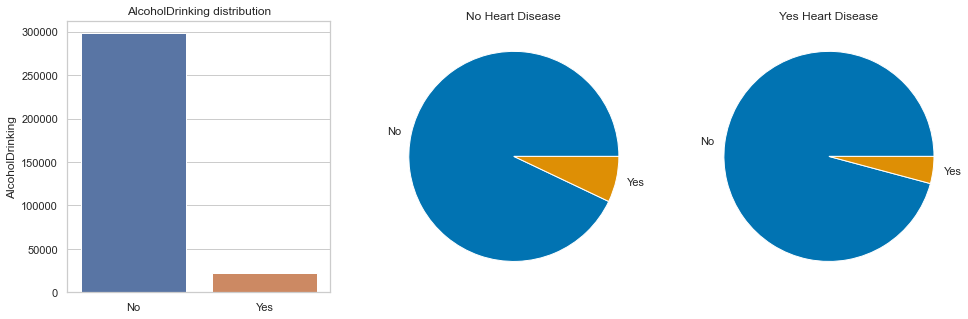

In [274]:
HeartDisease_and_bin('AlcoholDrinking')

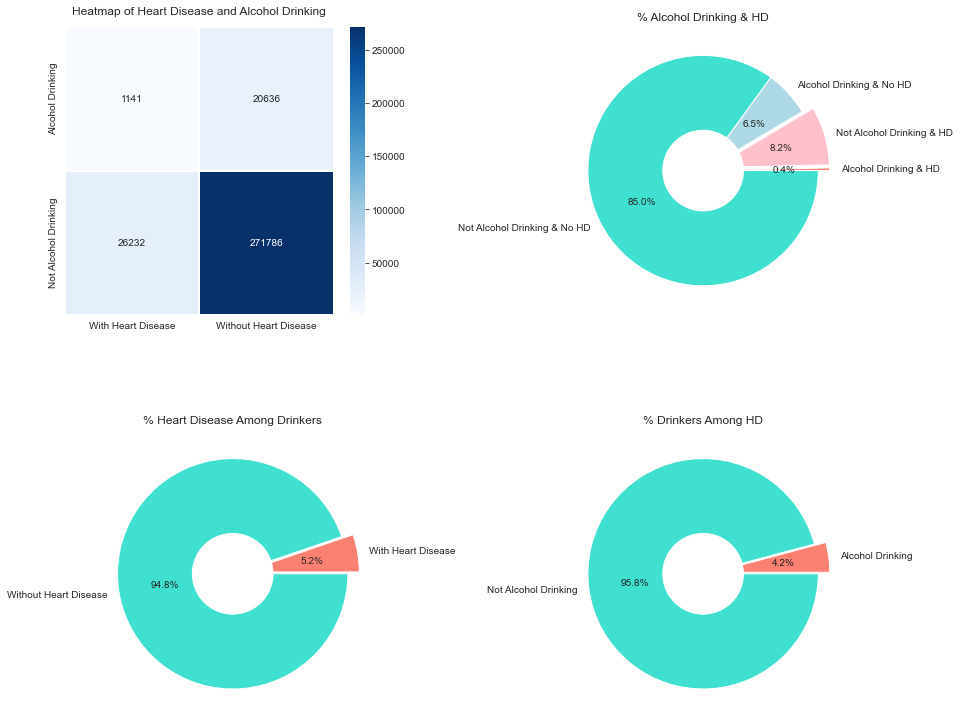

In [9]:
ad_idx= ["Alcohol Drinking", "Not Alcohol Drinking"]
ad_all_labs = ["Alcohol Drinking & HD",
               "Not Alcohol Drinking & HD",
               "Alcohol Drinking & No HD",
               "Not Alcohol Drinking & No HD"]
observ.binviz("AlcoholDrinking", ad_idx,
              "Heatmap of Heart Disease and Alcohol Drinking",
              ad_all_labs,
              don_all_title= "% Alcohol Drinking & HD",
              don_one_title= "% Heart Disease Among Drinkers",
              don_two_title= "% Drinkers Among HD")

Drinking alcohol does not affect (slightly reduces) the likelihood of having heart disease, this is unusual and may be due to a "third" variable.

But, Excessive alcohol intake can lead to high blood pressure, heart failure or stroke. Excessive drinking can also contribute to cardiomyopathy, a disorder that affects the heart muscle. What's more, alcohol can contribute to obesity and the long list of health problems that can go along with it.

### Target variable and Stroke

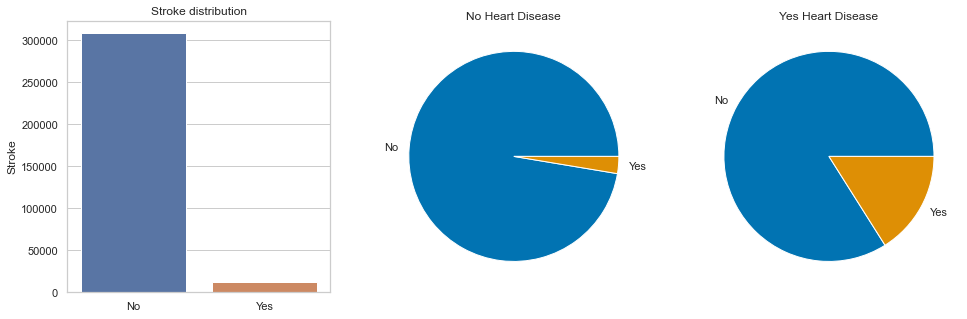

In [275]:
HeartDisease_and_bin('Stroke')

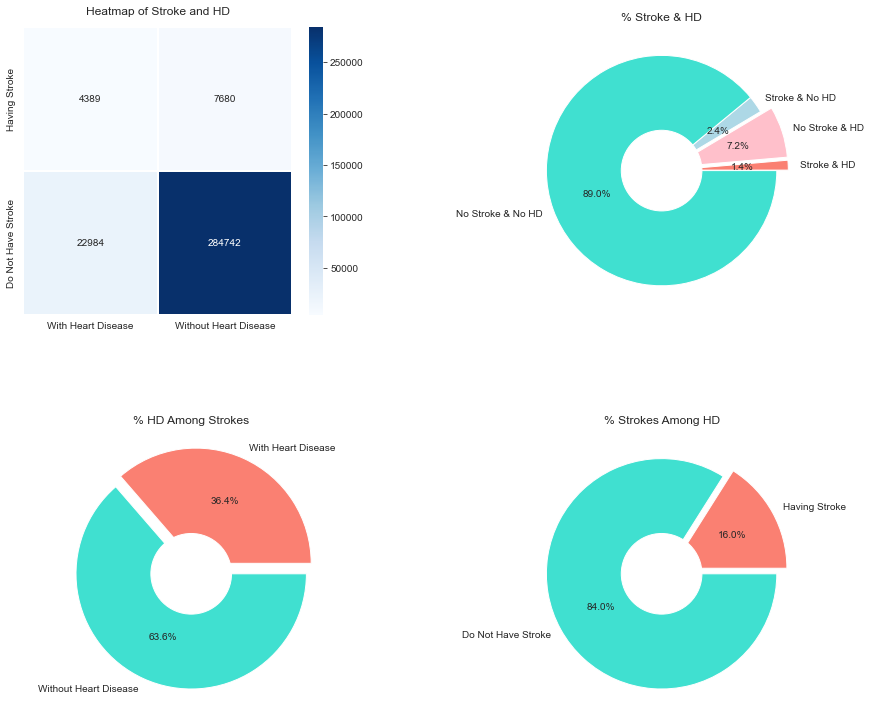

In [10]:
stroke_idx = ["Having Stroke", "Do Not Have Stroke"]
stroke_all_labs = ["Stroke & HD",
                   "No Stroke & HD",
                   "Stroke & No HD",
                   "No Stroke & No HD"]
observ.binviz("Stroke", stroke_idx,
              "Heatmap of Stroke and HD",
              stroke_all_labs,
              don_all_title= "% Stroke & HD",
              don_one_title= "% HD Among Strokes",
              don_two_title= "% Strokes Among HD")

Stroke increases the risk of heart disease.

### Target variable and DiffWalking

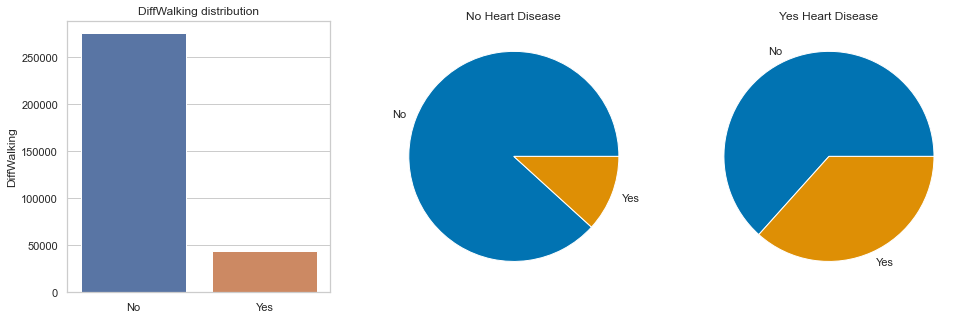

In [276]:
HeartDisease_and_bin('DiffWalking')

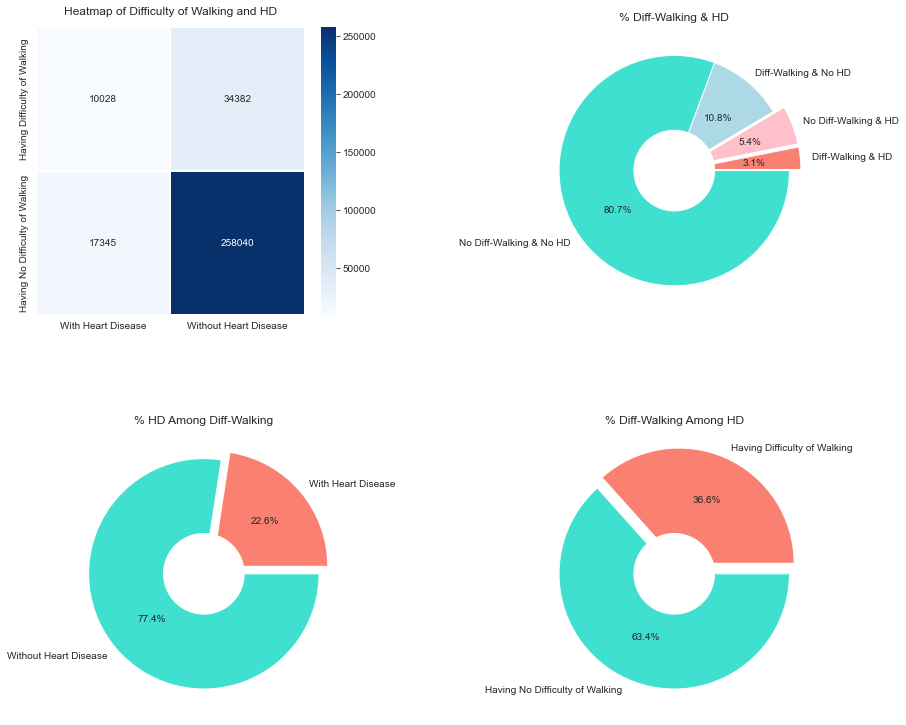

In [13]:
diffw_idx = ["Having Difficulty of Walking", "Having No Difficulty of Walking"]
diffw_all_labs = ["Diff-Walking & HD",
                  "No Diff-Walking & HD",
                  "Diff-Walking & No HD",
                  "No Diff-Walking & No HD"]
observ.binviz("DiffWalking", diffw_idx,
              "Heatmap of Difficulty of Walking and HD",
              diffw_all_labs,
              don_all_title= "% Diff-Walking & HD",
              don_one_title= "% HD Among Diff-Walking",
              don_two_title= "% Diff-Walking Among HD")

Difficulty walking or climbing stairs is more common in people with heart disease.


People with difficulty walking tend to have a higher chance of getting heart disease.

### Target variable and Physical Activity

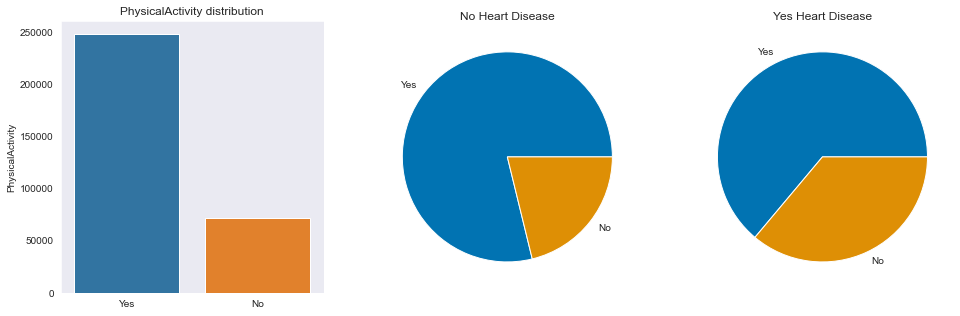

In [31]:
HeartDisease_and_bin('PhysicalActivity')

In [32]:
train_mod_df = df.copy()
dummy_list = []
for val in train_mod_df["PhysicalActivity"]:
    dummy_list.append("Yes") if val == "No" else dummy_list.append("No")
train_mod_df["LackPhysAct"] = dummy_list

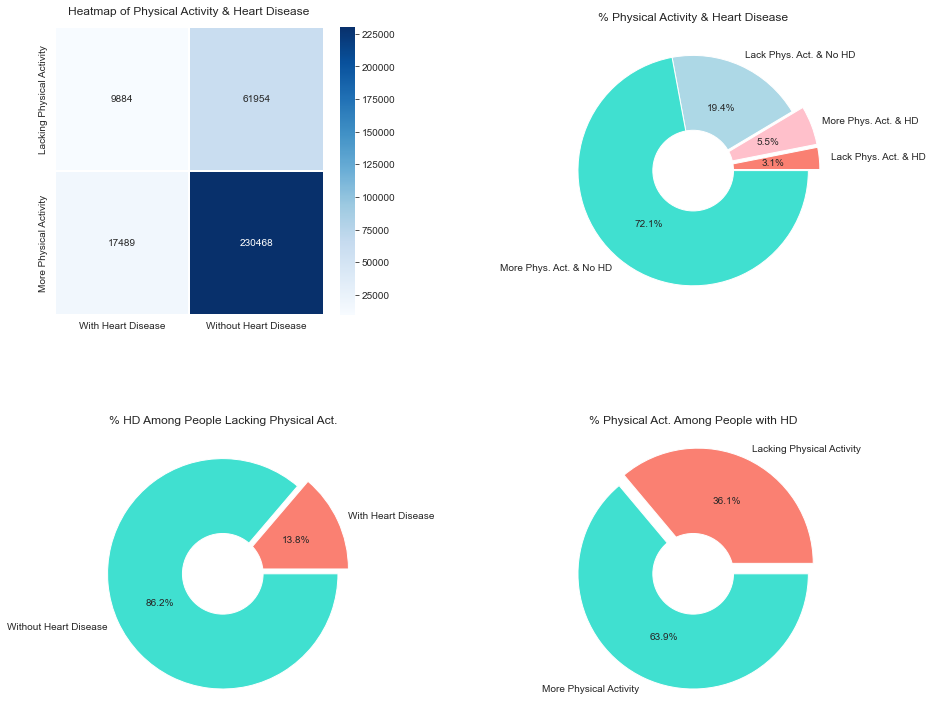

In [33]:
observ_k = VizData(train_mod_df, "HeartDisease", "With Heart Disease", "Without Heart Disease")
observ_k.binviz("LackPhysAct",
              ["Lacking Physical Activity", "More Physical Activity"],
              "Heatmap of Physical Activity & Heart Disease",
              ["Lack Phys. Act. & HD", "More Phys. Act. & HD",
               "Lack Phys. Act. & No HD", "More Phys. Act. & No HD"],
              don_all_title= "% Physical Activity & Heart Disease",
              don_one_title= "% HD Among People Lacking Physical Act.",
              don_two_title= "% Physical Act. Among People with HD")

The number of physical activity other than working in the past 30 days decreases the chance of getting heart disease.

### Target variable and Asthma

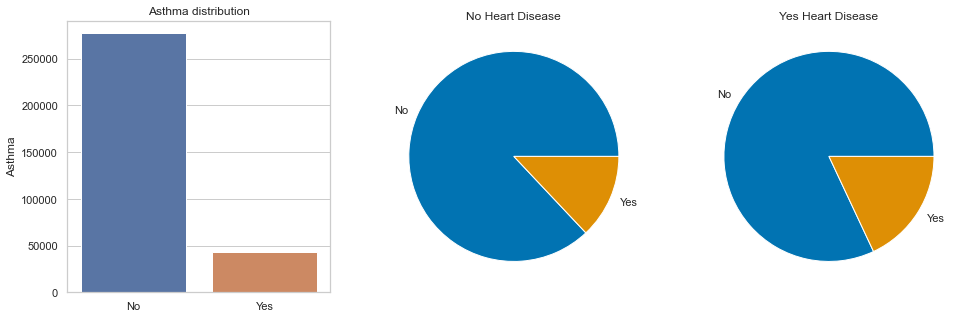

In [277]:
HeartDisease_and_bin('Asthma')

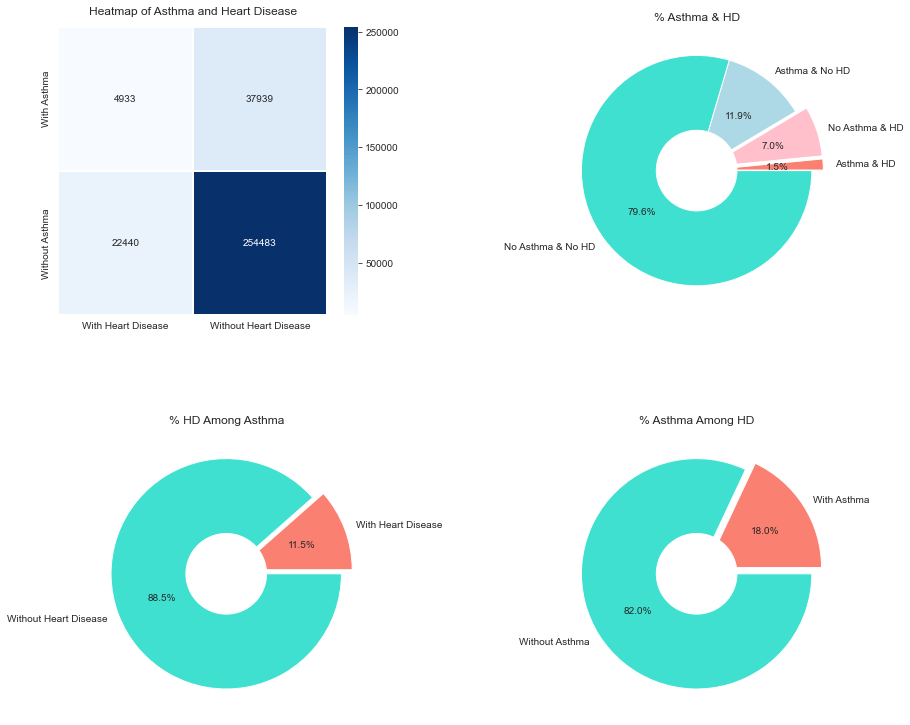

In [37]:
observ.binviz("Asthma", ["With Asthma", "Without Asthma"],
              "Heatmap of Asthma and Heart Disease",
              ["Asthma & HD",
               "No Asthma & HD",
               "Asthma & No HD",
               "No Asthma & No HD"],
              don_all_title= "% Asthma & HD",
              don_one_title= "% HD Among Asthma",
              don_two_title= "% Asthma Among HD")

Asthma slightly increases the chance of having heart disease, it gives a small contribution.

### Target variable and KidneyDisease

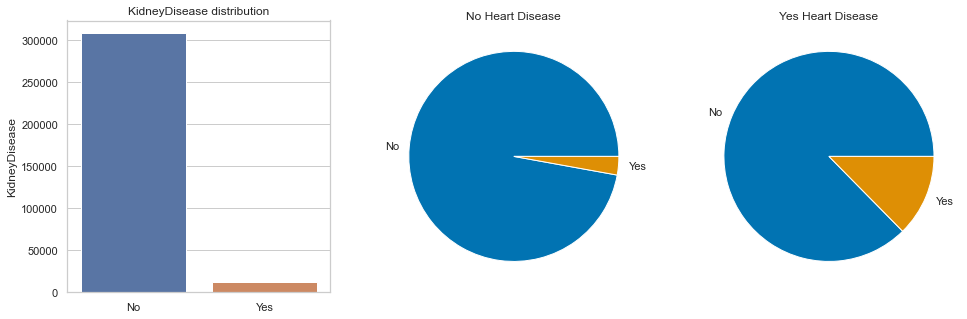

In [278]:
HeartDisease_and_bin('KidneyDisease')

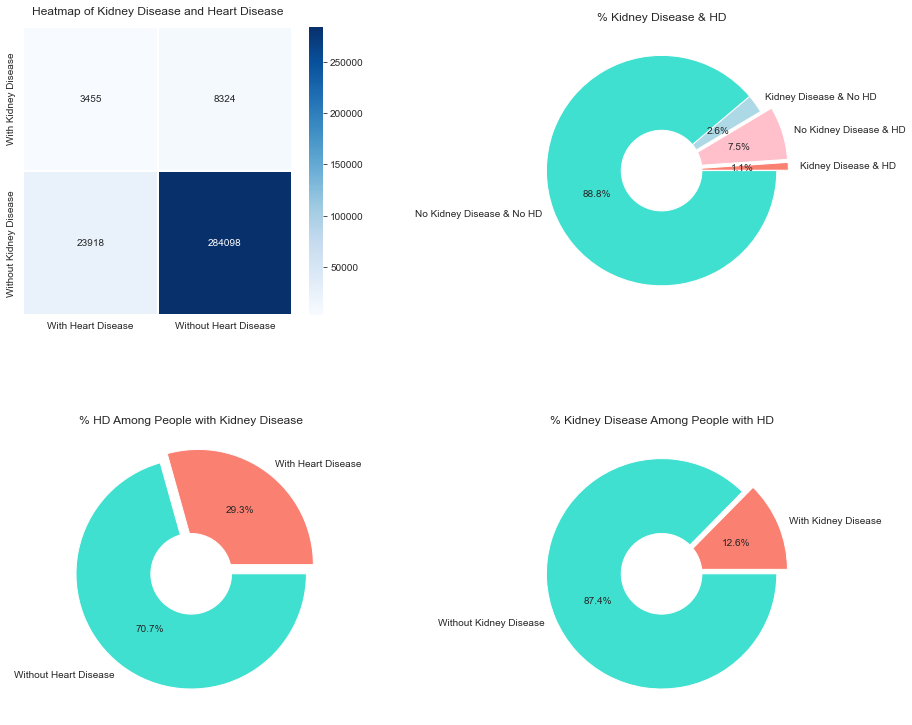

In [38]:
observ.binviz("KidneyDisease",
              ["With Kidney Disease", "Without Kidney Disease"],
              "Heatmap of Kidney Disease and Heart Disease",
              ["Kidney Disease & HD",
               "No Kidney Disease & HD",
               "Kidney Disease & No HD",
               "No Kidney Disease & No HD"],
              don_all_title= "% Kidney Disease & HD",
              don_one_title= "% HD Among People with Kidney Disease",
              don_two_title= "% Kidney Disease Among People with HD")

Kidney diseaes cannot be considred as an indicator of heart diaseses When the kidneys don't work well, more stress is put on the heart. When someone has CKD, their heart needs to pump harder to get blood to the kidneys. This can lead to heart disease, the leading cause of death in the United States. Change in blood pressure is also a CKD complication that can lead to heart disease.

### Target variable and SkinCancer

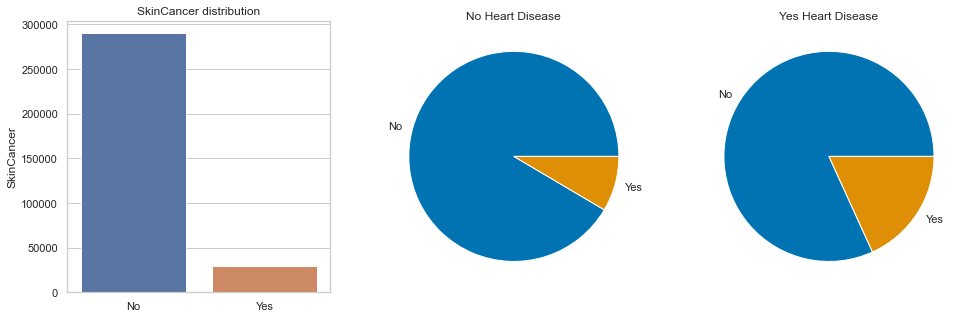

In [279]:
HeartDisease_and_bin('SkinCancer')

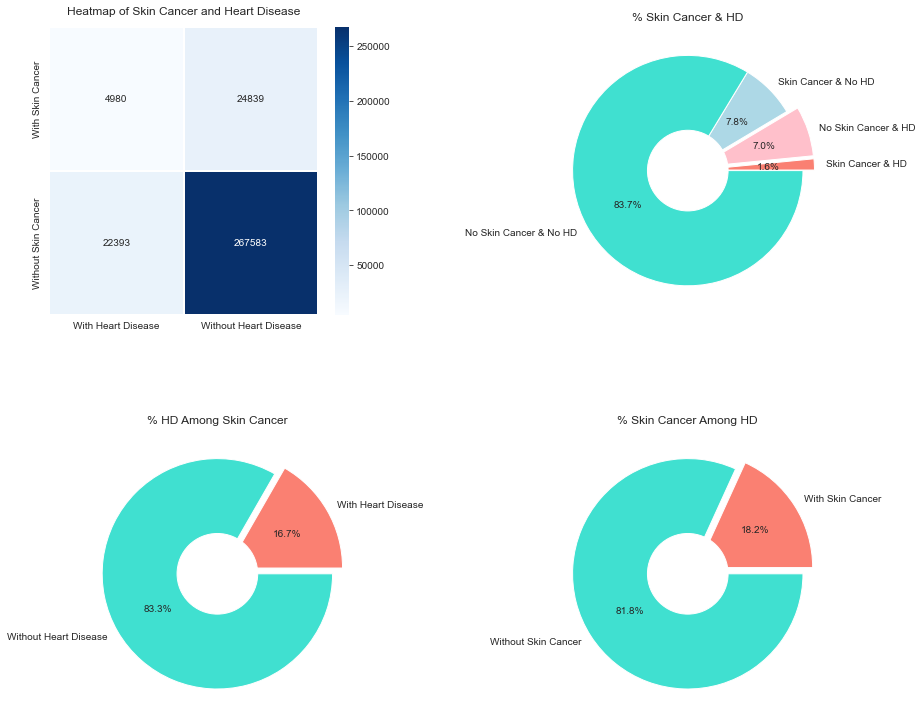

In [39]:
observ.binviz("SkinCancer", ["With Skin Cancer", "Without Skin Cancer"],
              "Heatmap of Skin Cancer and Heart Disease",
              ["Skin Cancer & HD",
               "No Skin Cancer & HD",
               "Skin Cancer & No HD",
               "No Skin Cancer & No HD"],
              don_all_title= "% Skin Cancer & HD",
              don_one_title= "% HD Among Skin Cancer",
              don_two_title= "% Skin Cancer Among HD")

Kidney disease and skin cancer increase the chance of having heart disease.

## 2. Numerical Variable:

- BMI

- PhysicalHealth

- MentalHealth

- SleepTime

### To see only numerical variables:

In [280]:
df_num=df.select_dtypes(include=["float64"])
df_num.head(10)

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0
5,28.87,6.0,0.0,12.0
6,21.63,15.0,0.0,4.0
7,31.64,5.0,0.0,9.0
8,26.45,0.0,0.0,5.0
9,40.69,0.0,0.0,10.0


In [281]:
num_f = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [282]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


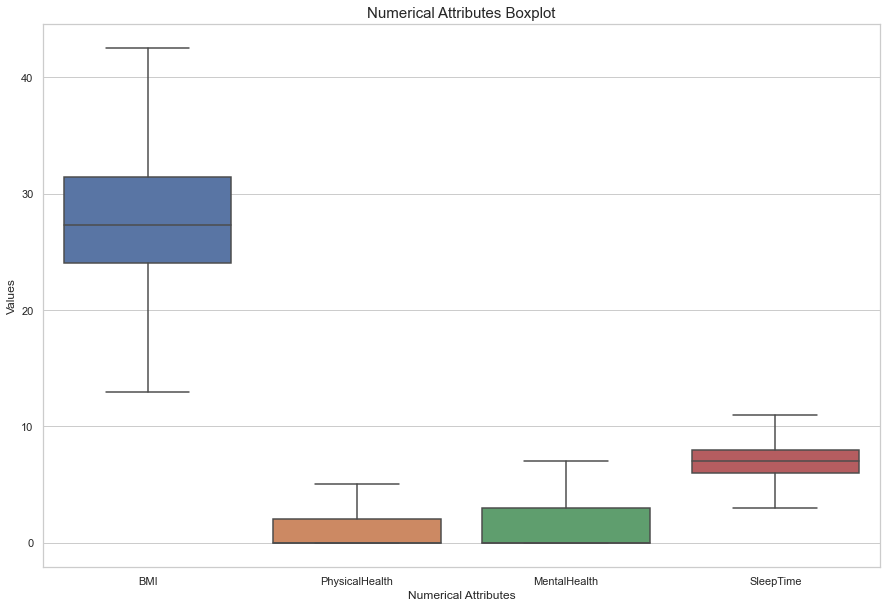

In [283]:
plt.figure(figsize=(15,10))
sns.set_theme(style="whitegrid")
sns.boxplot(data=df_num, showfliers=False)  
plt.xlabel("Numerical Attributes", fontsize= 12)
plt.ylabel("Values", fontsize= 12)
plt.title("Numerical Attributes Boxplot", fontsize= 15)
plt.show()

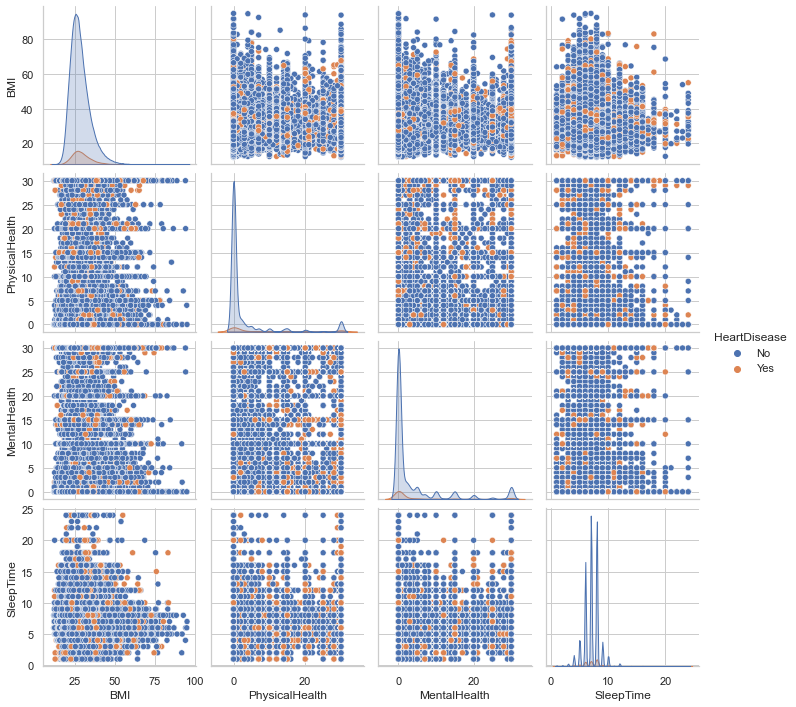

In [284]:
df_numerical = df_num.join(df['HeartDisease'])
sns.pairplot(df_numerical,hue="HeartDisease");

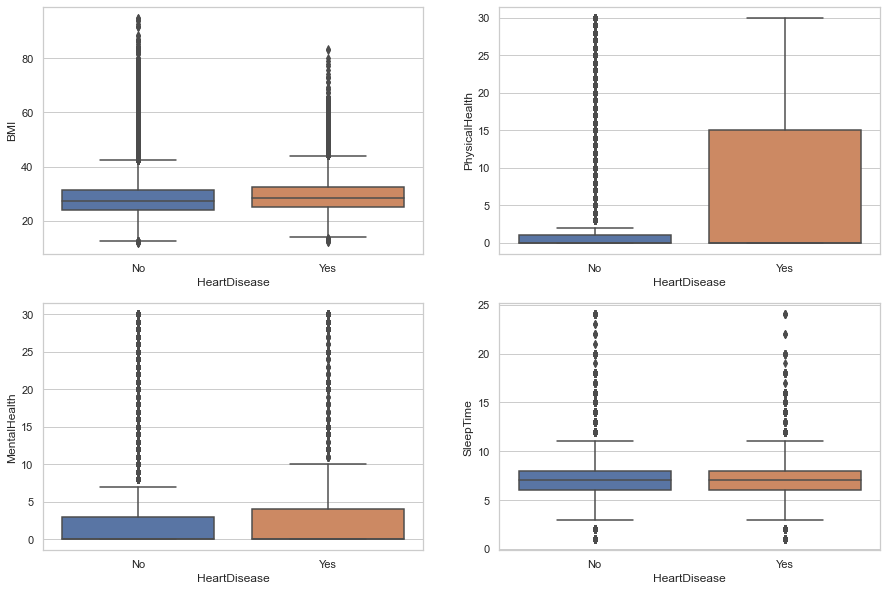

In [285]:
plt.figure(figsize=(15,10))
for i, num in enumerate(num_f):
    plt.subplot(2,2, i+1)
    sns.boxplot(y=df[num], x=df['HeartDisease'])

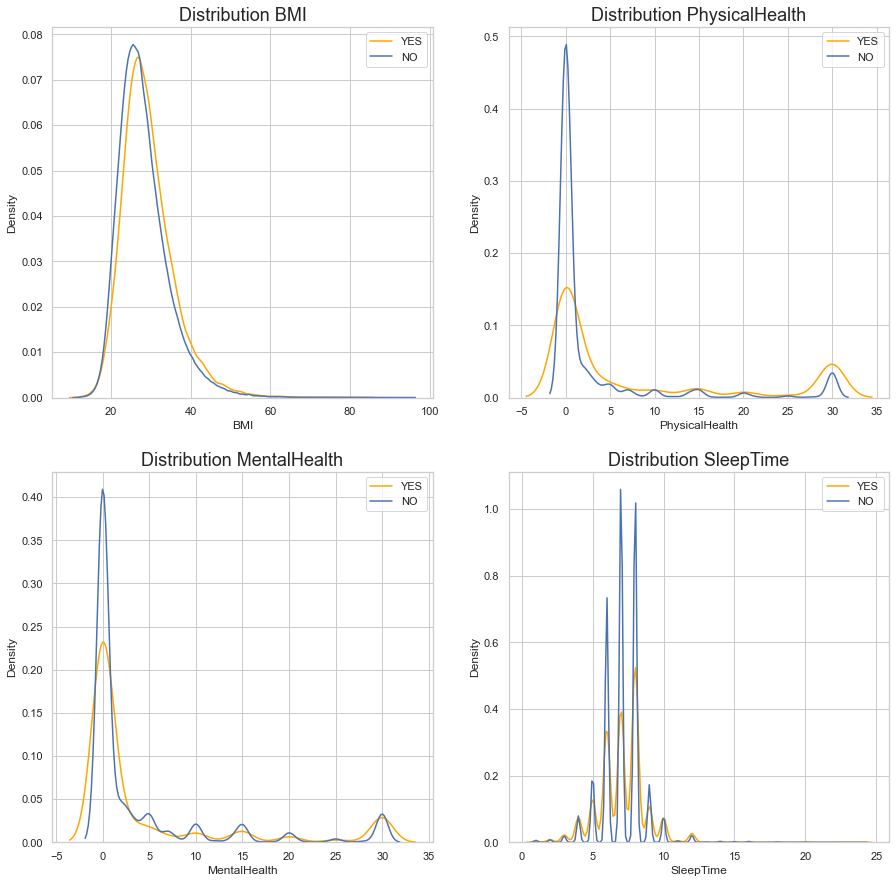

In [286]:
plt.figure(figsize=(15,15))
for i, num in enumerate(num_f):
    plt.subplot(2,2, i+1)
    sns.kdeplot(df[df["HeartDisease"] == 'Yes'][num], label = 'YES', color='orange')
    sns.kdeplot(df[df['HeartDisease'] == 'No'][num], label = 'NO')
    plt.legend()
    plt.title(f'Distribution {num}', fontsize=18)

## BMI and Heart Disease

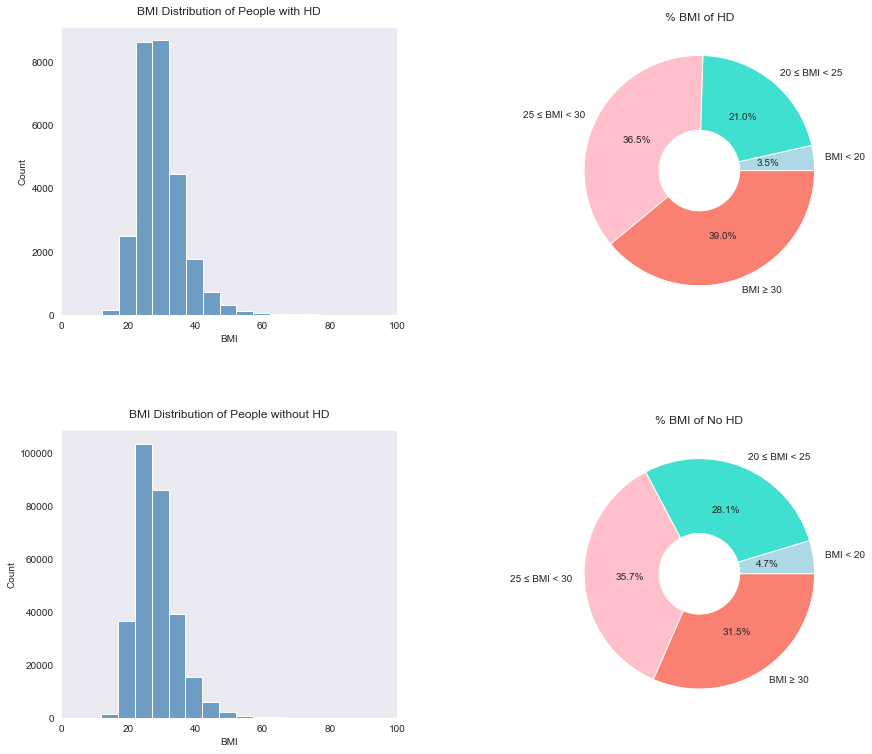

In [7]:

observ = VizData(df, "HeartDisease", "With Heart Disease", "Without Heart Disease")
bmi_labs = ["BMI < 20", "20 ≤ BMI < 25", "25 ≤ BMI < 30", "BMI ≥ 30"]
bmi_div = [20, 25, 30]
observ.numviz("BMI", bmi_labs, bmi_labs, bmi_div, bmi_div,
              ["lightblue", "turquoise", "pink", "salmon"],
              ["lightblue", "turquoise", "pink", "salmon"],
              (0, 100), (0, 100),
              h1_tit= "BMI Distribution of People with HD",
              h2_tit= "BMI Distribution of People without HD",
              d1_tit= "% BMI of HD",
              d2_tit= "% BMI of No HD"
             )

- BMI contributes to heart disease. People with BMI less than 20 or greater than 25 tend to have a higher chance of getting heart disease.

## Physical Health Problems and Heart Disease

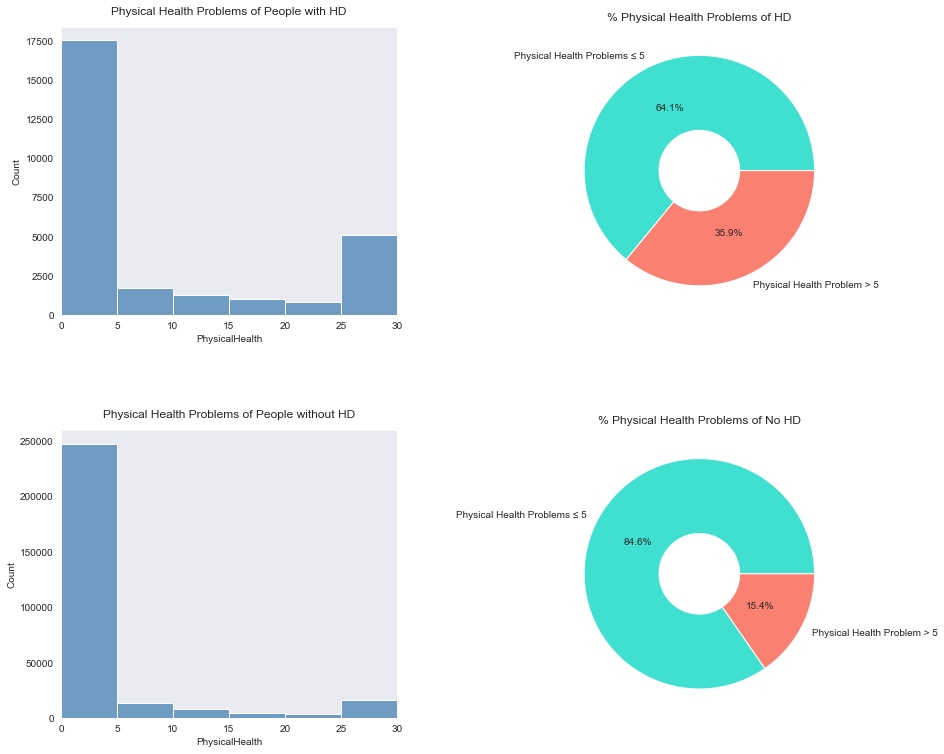

In [11]:

php_labs = ["Physical Health Problems ≤ 5", "Physical Health Problem > 5"]
php_div = [5]
observ.numviz("PhysicalHealth",
              php_labs, php_labs,
              php_div, php_div,
              ["turquoise", "salmon"],
              ["turquoise", "salmon"],
              (0, 30), (0, 30),
              h1_tit= "Physical Health Problems of People with HD",
              h2_tit= "Physical Health Problems of People without HD",
              d1_tit= "% Physical Health Problems of HD",
              d2_tit= "% Physical Health Problems of No HD")

-  The number of days in physical health was poor increases the likelihood of having heart disease.


- The number of physical health problems experienced within the past 30 days contributes to heart disease.

## Mental Health Problems and Heart Disease

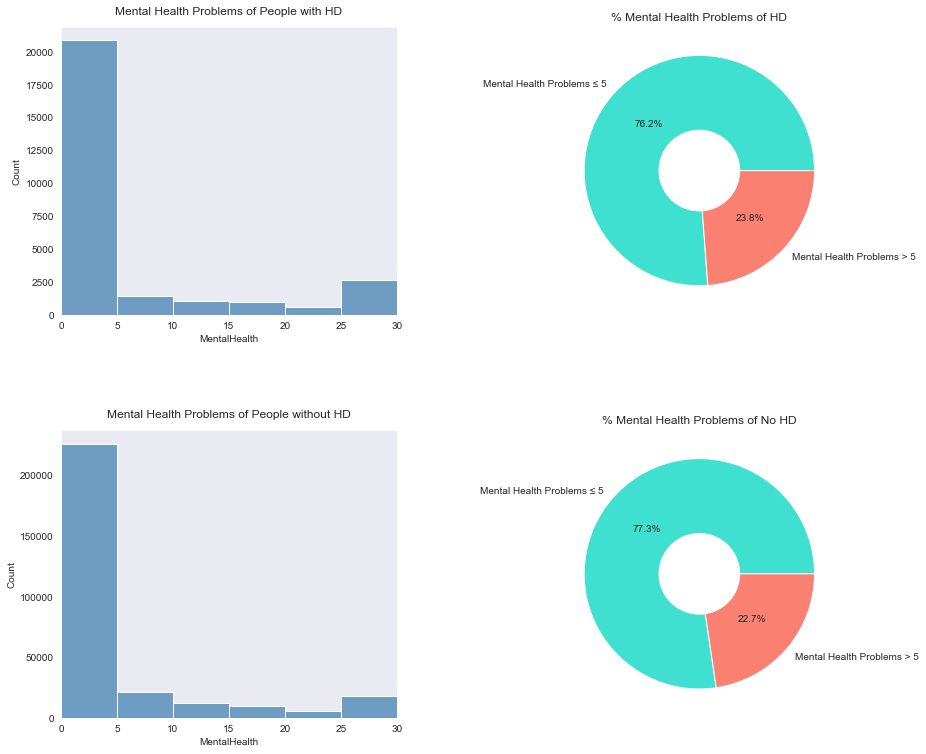

In [12]:
mhp_labs = ["Mental Health Problems ≤ 5", "Mental Health Problems > 5"]
mhp_div = [5]
observ.numviz("MentalHealth",
              mhp_labs, mhp_labs,
              mhp_div, mhp_div,
              ["turquoise", "salmon"],
              ["turquoise", "salmon"],
              (0, 30), (0, 30),
              h1_tit= "Mental Health Problems of People with HD",
              h2_tit= "Mental Health Problems of People without HD",
              d1_tit= "% Mental Health Problems of HD",
              d2_tit= "% Mental Health Problems of No HD")

- Mental health status slightly affect the likelihood of having heart disease.


- The number of mental health problems within the same interval only gives a small contribution to heart disease.

## Sleep Time and Heart Disease

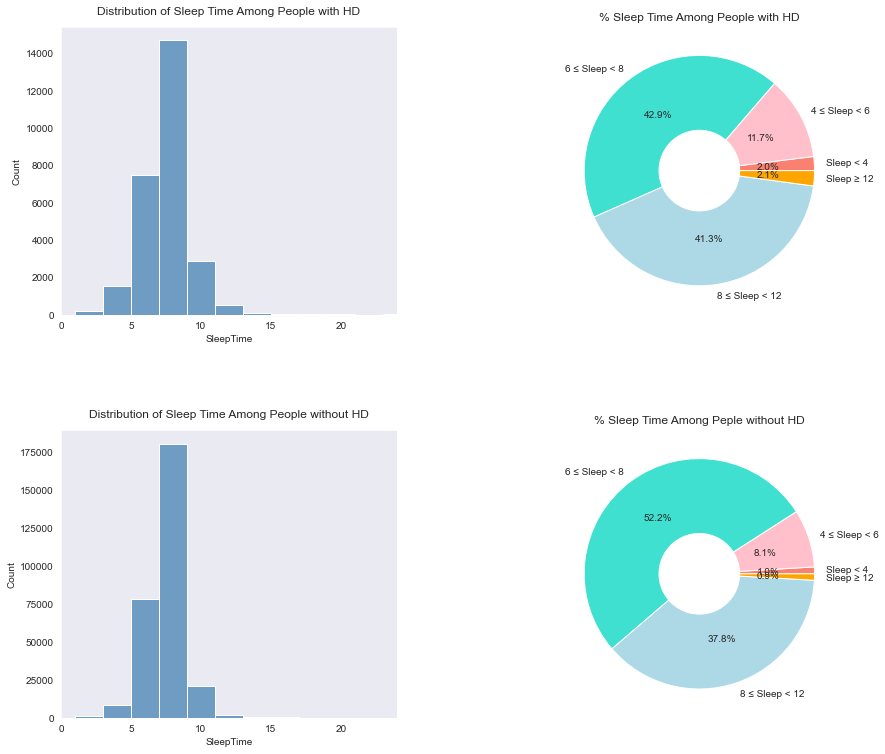

In [35]:
m_labs = ["Sleep < 4", "4 ≤ Sleep < 6", "6 ≤ Sleep < 8", "8 ≤ Sleep < 12", "Sleep ≥ 12"]
m_div = [4, 6, 8, 12]
m_colors = ["salmon", "pink", "turquoise", "lightblue", "orange"]
observ.numviz("SleepTime", m_labs, m_labs,
              m_div, m_div,
              m_colors, m_colors,
              (0, 24), (0, 24),
              hist_binwidth= 2,
              h1_tit= "Distribution of Sleep Time Among People with HD",
              h2_tit= "Distribution of Sleep Time Among People without HD",
              d1_tit= "% Sleep Time Among People with HD",
              d2_tit= "% Sleep Time Among Peple without HD")

The amount of sleep time in a day does not seem to give a considerable contribution to heart disease. However, people without heart disease commonly have a better sleep time, that is about 6 to 8 hours in a day.

# 5- Data Preprocessing

In [367]:
df['ID']=range(1,319796)
df=df.set_index("ID")

In [368]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
ID,,,,,,,,,,,,,,,,,,
1,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
2,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
3,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
4,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
5,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319791,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319792,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319793,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No


## VISUALIZATION

In [386]:
df_num.head(1)

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.6,3.0,30.0,5.0


### Correlation Between BMI-PhysicalHealth-MentalHealth-SleepTime

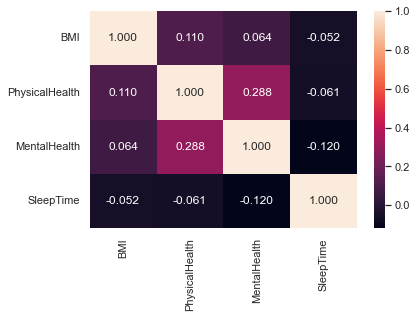

In [387]:
corr_list=["BMI","PhysicalHealth","MentalHealth","SleepTime"]
sns.heatmap(df[corr_list].corr(),annot=True,fmt=".3f");

### Categorical Feature Encoding

In [388]:
bin_cat = list(df.nunique()[df.nunique() == 2].index)
bin_cat

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'PhysicalActivity',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [389]:
bin_cat.remove('Sex')
bin_cat

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'PhysicalActivity',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [390]:
for i in bin_cat:
    df[i] = df[i].map({'Yes':1, 'No':0})

In [391]:
df['Sex'] = df['Sex'].map({'Female':1, 'Male':0})

In [392]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
ID,,,,,,,,,,,,,,,,,,
1,0,16.60,1,0,0,3.0,30.0,0,1,55-59,White,Yes,1,Very good,5.0,1,0,1
2,0,20.34,0,0,1,0.0,0.0,0,1,80 or older,White,No,1,Very good,7.0,0,0,0
3,0,26.58,1,0,0,20.0,30.0,0,0,65-69,White,Yes,1,Fair,8.0,1,0,0
4,0,24.21,0,0,0,0.0,0.0,0,1,75-79,White,No,0,Good,6.0,0,0,1
5,0,23.71,0,0,0,28.0,0.0,1,1,40-44,White,No,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319791,1,27.41,1,0,0,7.0,0.0,1,0,60-64,Hispanic,Yes,0,Fair,6.0,1,0,0
319792,0,29.84,1,0,0,0.0,0.0,0,0,35-39,Hispanic,No,1,Very good,5.0,1,0,0
319793,0,24.24,0,0,0,0.0,0.0,0,1,45-49,Hispanic,No,1,Good,6.0,0,0,0


In [393]:
age = {}
for i in df['AgeCategory'].unique():
    x = int(i[:2])
    age[i] = x
age

{'55-59': 55,
 '80 or older': 80,
 '65-69': 65,
 '75-79': 75,
 '40-44': 40,
 '70-74': 70,
 '60-64': 60,
 '50-54': 50,
 '45-49': 45,
 '18-24': 18,
 '35-39': 35,
 '30-34': 30,
 '25-29': 25}

In [394]:
df['AgeCategory'] = df['AgeCategory'].map(age)

In [395]:
df = pd.get_dummies(df)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
ID,,,,,,,,,,,,,,,,,,,,,
1,0,16.60,1,0,0,3.0,30.0,0,1,55,...,1,0,0,1,0,0,0,0,0,1
2,0,20.34,0,0,1,0.0,0.0,0,1,80,...,1,1,0,0,0,0,0,0,0,1
3,0,26.58,1,0,0,20.0,30.0,0,0,65,...,1,0,0,1,0,0,1,0,0,0
4,0,24.21,0,0,0,0.0,0.0,0,1,75,...,1,1,0,0,0,0,0,1,0,0
5,0,23.71,0,0,0,28.0,0.0,1,1,40,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319791,1,27.41,1,0,0,7.0,0.0,1,0,60,...,0,0,0,1,0,0,1,0,0,0
319792,0,29.84,1,0,0,0.0,0.0,0,0,35,...,0,1,0,0,0,0,0,0,0,1
319793,0,24.24,0,0,0,0.0,0.0,0,1,45,...,0,1,0,0,0,0,0,1,0,0


### Pearson Correlation

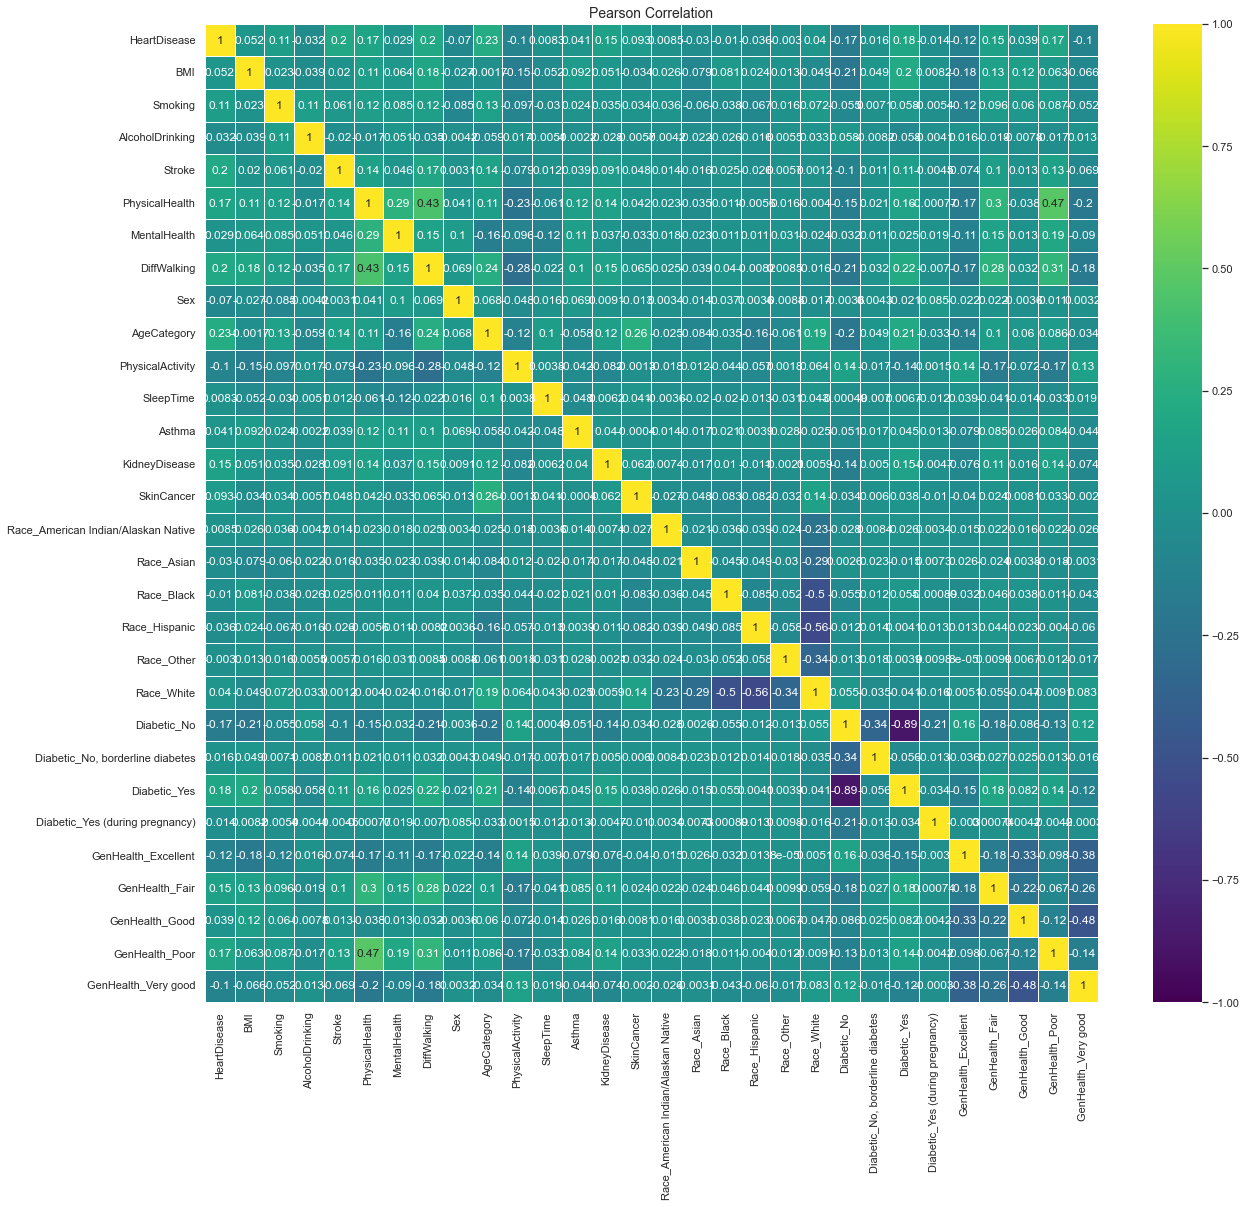

In [396]:
correlation = df.corr()

corr = plt.figure(figsize= (20, 18))
corr = sns.heatmap(correlation, vmax=1, vmin=-1,
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white")
corr.set_title("Pearson Correlation",fontsize= 14)

plt.show()